In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nelgiriyewithana_top_spotify_songs_2023_path = kagglehub.dataset_download('nelgiriyewithana/top-spotify-songs-2023')

print('Data source import complete.')


100%|██████████| 47.1k/47.1k [00:00<00:00, 26.7MB/s]

Extracting files...
Data source import complete.



### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🏴‍☠️🏴‍☠️🏴‍☠️🏴‍☠️🏴‍☠️ &nbsp;&nbsp;&nbsp;&nbsp; 🌌🌌🌌🌌🌌🌌🌌

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🧙‍ <span style="color:#5E6997"> Wizard Notebook </span> 🧙‍ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🏴‍☠️ &nbsp; <span style="color:#5E6997"> F.G.J </span> &nbsp;&nbsp;🏴‍☠️ &nbsp;&nbsp;&nbsp; 🌌 &nbsp;&nbsp; <span style="color:#5E6997"> Spaceman </span> &nbsp;&nbsp;&nbsp; 🌌 &nbsp;

 ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍🧙‍ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 🏴‍☠️🏴‍☠️🏴‍☠️🏴‍☠️🏴‍☠️  &nbsp;&nbsp;&nbsp;&nbsp; 🌌🌌🌌🌌🌌🌌🌌

<br>
    
<br>    

# <span style="color:#5E6997"> Spotify Data: Top 1000 Song Case Study (Data Analysis / Python) </span>

## <span style="color:#5E6997"> What Does It Take to Hit the Charts </span>

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore](#process)
* [<span style="color:#A690A4"> 3. Analyze & Visualization: Data Analysis](#analyze)


    
## <span style="color:#5E6997"> Executive Summary </span> <a class="anchor" id="exe_sum"></a>
    
### Key Findings
* Mode, Key and BPM play a bigger role than the rest.

* "Mode: Major / Minor" plays an important role for the success of a song. It has been found that:
    - The top 10: 70% of Majors vs 40% of Majors for the Last 10 and vs 55,32% overall.
    - The top 50: 68% of major vs 54% for the Last 50 and vs 55,32% overall.
    
    
* "Key": C# is the golden key. It has been found that:
    - Top 10: 30% of C# vs 10% for the last 10 songs and 14.1% overall.
    - Top 50: 24% of C# vs 14% for the last 50 songs.
    - Top 100:18% of C#.
    
    
* BPM matters, and not slowing down too much is the key. It has been found:
    - Best range is between 110 and 90.
    - Overall average is 122.
    - Top 10 BPM: average is 117, with a high standard deviation (+34). Majority of Top 10 below 110.
    - Top 10 BPM minimum is 90 and minimum overall is 65.
    
    
* Energy Score, you need to share atleast a minimum of energy to be successful:
    - Top 10: smallest standard deviation, ranging from 78 to 45 with an average of 59.6, smaller than the overall.
    - Optimal range: 78 to 45

    
### Objective & Scope
* Collect, clean & analyze Spotify dataset
* Identify variable of interest
* Allow businesses to make data-driven decisions based on the given dataset
* Share findings and insights
    
### Methodology
* **Collect** data using "top-spotify-songs-2023"
* **Wrangle** data using preprocessing, cleaning, transforming and organizing data for further analysis including predictive.
* **Explore** data using available techniques
* **Visualize** data to uncover insightful discoveries
   

## <span style="color:#5E6997"> Introduction </span> <a class="anchor" id="intro"></a>
    
**Leading questions are:**
1. What makes a song, a good song according to the dataset?
2. Can we identify variables of interest that can be used to predict wether or not (True or False) a song will make it the top top 50, top 100, top 500?
3. Can the data be transformed for Binary Classification algorithms ?

###**Jawaban**
1. Berdasarkan dataset spotify-2023.csv, sebuah lagu yang dianggap "good" atau berhasil masuk Top Chart (Top 50, 100, 500) memiliki karakteristik sebagai berikut.
- streams: Lagu dengan jumlah stream yang tinggi cenderung masuk chart.
- danceability_%: Lagu yang enak untuk berdansa cenderung lebih populer.
- energy_% dan valence_%: Lagu dengan energi tinggi dan emosi positif biasanya lebih menarik.
- bpm (beats per minute): Tempo yang sedang hingga cepat lebih dominan.
- released_year: Lagu-lagu yang lebih baru cenderung lebih banyak didengarkan.

2. Bisa dengan membuat variabel target baru berdasarkan ranking dan mengidentifikasi variabel penting menggunakan korelasi dan feature importance. Contoh kodenya.
```python
df['rank'] = df['streams'].rank(ascending=False)
```
```python
df['top_50'] = df['rank'] <= 50
df['top_100'] = df['rank'] <= 100
df['top_500'] = df['rank'] <= 500
```

3. Bisa menggunakan kode berikut.
```python
df['target'] = (df['rank'] <= 100).astype(int)  # 1 jika top 100, 0 jika tidak
```
```python
features = ['bpm', 'danceability_%', 'energy_%', 'valence_%',
            'acousticness_%', 'instrumentalness_%', 'released_year']
```
```python
X = df[features]
y = df['target']
```


**Data Source**:
Data has been grabbed using Spotify API by Nidula Elgiriyewithana.
    
**Preface**:
I am conducting this analysis for fun and for "sport" as a training. I am considering this as Part 1, and Part 2 will be the predictive modeling. Also for the ones that are learning, I believe you will find some valuable information within this notebook.
Enjoy.

<br>

                 ⚜️                                                     🦅
               _______                                                ________
              |_______|                                              |________|
             /_________\                                            /__________\
            /____________\                                         /____________\
           |____|    |____|                                       |____|    |____|
          /_____/____\_____\                                     /_____/____\_____\
         /_____/______\______\                                  /_____/______\______\
        /_____/________\______\                                /_____/________\______\
       /_____/__________\______\                              /_____/__________\______\
    __/_____/____________\______\__                        __/_____/____________\______\__
    
<br>   

# <span style="color:#5E6997"> Collect, Wrangle & Explore </span> <a class="anchor" id="process"></a>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/irmanprayista31/Machine-Learning/main/Week%205/Dataset/spotify-2023.csv', encoding='ISO-8859-1')
#df_2 = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')

df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
nan_values = df.isna()
print(nan_values)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0         False           False         False          False           False   
1         False           False         False          False           False   
2         False           False         False          False           False   
3         False           False         False          False           False   
4         False           False         False          False           False   
..          ...             ...           ...            ...             ...   
948       False           False         False          False           False   
949       False           False         False          False           False   
950       False           False         False          False           False   
951       False           False         False          False           False   
952       False           False         False          False           False   

     released_day  in_spotify_playlists

In [ ]:
any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()

for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)

print("\nMissing Value Counts in Each Column:")
print(missing_value_count)

-----> Column 'in_shazam_charts' has 50 missing values.
-----> Column 'key' has 95 missing values.

Missing Values in the Entire DataFrame?
True

Missing Values in Each Column?
track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

Missing Value Counts in Each Column:
track_name               0
artist(s)_name           0

In [ ]:
df = df.dropna(subset=['key'])

In [ ]:
# DROP NA USED
# DROP NA USED
df.dropna(inplace=True)


**DROPNA USED ON DF**

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            817 non-null    object 
 1   artist(s)_name        817 non-null    object 
 2   artist_count          817 non-null    int64  
 3   released_year         817 non-null    int64  
 4   released_month        817 non-null    int64  
 5   released_day          817 non-null    int64  
 6   in_spotify_playlists  817 non-null    int64  
 7   in_spotify_charts     817 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    817 non-null    int64  
 10  in_apple_charts       817 non-null    int64  
 11  in_deezer_playlists   817 non-null    object 
 12  in_deezer_charts      817 non-null    int64  
 13  in_shazam_charts      817 non-null    object 
 14  bpm                   817 non-null    int64  
 15  key                   817 no

In [ ]:
track_name_to_id = {name: idx for idx, name in enumerate(df['track_name'].unique())}

df['track_id'] = df['track_name'].map(track_name_to_id)
df.drop(columns=['track_name'], inplace=True)

In [ ]:
voi_col = ['track_id', 'streams','bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voi = df[voi_col]
df_voi.head()

track_id      streams  bpm key   mode  danceability_%  valence_%  energy_%  \
0         0  141381703.0  125   B  Major              80         89        83   
1         1  133716286.0   92  C#  Major              71         61        74   
2         2  140003974.0  138   F  Major              51         32        53   
3         3  800840817.0  170   A  Major              55         58        72   
4         4  303236322.0  144   A  Minor              65         23        80   

   acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
0              31                   0           8              4  
1               7                   0          10              4  
2              17                   0          31              6  
3              11                   0          11             15  
4              14                  63          11              6

In [ ]:
#label encoding or one hot encoding?
df_features = df_voi
df_features = pd.get_dummies(df_voi, columns=['key', 'mode'], prefix=['key', 'mode'])

In [ ]:
df_features.head()

track_id      streams  bpm  danceability_%  valence_%  energy_%  \
0         0  141381703.0  125              80         89        83   
1         1  133716286.0   92              71         61        74   
2         2  140003974.0  138              51         32        53   
3         3  800840817.0  170              55         58        72   
4         4  303236322.0  144              65         23        80   

   acousticness_%  instrumentalness_%  liveness_%  speechiness_%  ...  key_C#  \
0              31                   0           8              4  ...   False   
1               7                   0          10              4  ...    True   
2              17                   0          31              6  ...   False   
3              11                   0          11             15  ...   False   
4              14                  63          11              6  ...   False   

   key_D  key_D#  key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0  False   False  False  False   False  False   False        True       False  
1  False   False  False  False   False  False   False        True       False  
2  False   False  False   True   False  False   False        True       False  
3  False   False  False  False   False  False   False        True       False  
4  False   False  False  False   False  False   False       False        True  

[5 rows x 23 columns]

In [ ]:
#df_features = df_features.apply(pd.to_numeric, errors='coerce')

In [ ]:
#rename columns of interests
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'
}

df_features.rename(columns=re_col, inplace=True)
df_features.head()

track_id      streams  bpm  danceability  valence  energy  acousticness  \
0         0  141381703.0  125            80       89      83            31   
1         1  133716286.0   92            71       61      74             7   
2         2  140003974.0  138            51       32      53            17   
3         3  800840817.0  170            55       58      72            11   
4         4  303236322.0  144            65       23      80            14   

   instrumentalness  liveness  speechiness  ...  key_C#  key_D  key_D#  key_E  \
0                 0         8            4  ...   False  False   False  False   
1                 0        10            4  ...    True  False   False  False   
2                 0        31            6  ...   False  False   False  False   
3                 0        11           15  ...   False  False   False  False   
4                63        11            6  ...   False  False   False  False   

   key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0  False   False  False   False        True       False  
1  False   False  False   False        True       False  
2   True   False  False   False        True       False  
3  False   False  False   False        True       False  
4  False   False  False   False       False        True  

[5 rows x 23 columns]

# <span style="color:#5E6997"> Analyze & Visualization: Data Analysis </span> <a class="anchor" id="analyze"></a>


In [ ]:
df_da = df_features.drop(columns=['track_id'])
df_da.head()

streams  bpm  danceability  valence  energy  acousticness  \
0  141381703.0  125            80       89      83            31   
1  133716286.0   92            71       61      74             7   
2  140003974.0  138            51       32      53            17   
3  800840817.0  170            55       58      72            11   
4  303236322.0  144            65       23      80            14   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0                 0         8            4  False  ...   False  False   False   
1                 0        10            4  False  ...    True  False   False   
2                 0        31            6  False  ...   False  False   False   
3                 0        11           15   True  ...   False  False   False   
4                63        11            6   True  ...   False  False   False   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0  False  False   False  False   False        True       False  
1  False  False   False  False   False        True       False  
2  False   True   False  False   False        True       False  
3  False  False   False  False   False        True       False  
4  False  False   False  False   False       False        True  

[5 rows x 22 columns]

In [ ]:
#df_da = df_features.astype(int)

In [ ]:
df_da.describe()

streams         bpm  danceability     valence      energy  \
count  8.160000e+02  817.000000    817.000000  817.000000  817.000000   
mean   4.689858e+08  122.565483     67.391677   51.201958   64.362301   
std    5.231267e+08   28.174803     14.688458   23.620978   16.107587   
min    2.762000e+03   65.000000     23.000000    4.000000   14.000000   
25%    1.342848e+08   99.000000     57.000000   32.000000   53.000000   
50%    2.638368e+08  120.000000     70.000000   51.000000   66.000000   
75%    6.011986e+08  141.000000     79.000000   70.000000   76.000000   
max    3.562544e+09  206.000000     96.000000   97.000000   97.000000   

       acousticness  instrumentalness    liveness  speechiness  
count    817.000000        817.000000  817.000000   817.000000  
mean      26.309670          1.676867   18.168911    10.526316  
std       25.470972          8.767328   13.541996    10.219987  
min        0.000000          0.000000    3.000000     2.000000  
25%        5.000000          0.000000   10.000000     4.000000  
50%       17.000000          0.000000   12.000000     6.000000  
75%       41.000000          0.000000   24.000000    12.000000  
max       97.000000         91.000000   97.000000    64.000000

In [ ]:
binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

for column in binary_columns:
    df_da[column] = df_da[column].astype(int)
print(df_da.head())

       streams  bpm  danceability  valence  energy  acousticness  \
0  141381703.0  125            80       89      83            31   
1  133716286.0   92            71       61      74             7   
2  140003974.0  138            51       32      53            17   
3  800840817.0  170            55       58      72            11   
4  303236322.0  144            65       23      80            14   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0                 0         8            4      0  ...       0      0       0   
1                 0        10            4      0  ...       1      0       0   
2                 0        31            6      0  ...       0      0       0   
3                 0        11           15      1  ...       0      0       0   
4                63        11            6      1  ...       0      0       0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0      0      0       0      0       0 

In [ ]:
df_da = df_da.astype(float)
df_da.head()

streams    bpm  danceability  valence  energy  acousticness  \
0  141381703.0  125.0          80.0     89.0    83.0          31.0   
1  133716286.0   92.0          71.0     61.0    74.0           7.0   
2  140003974.0  138.0          51.0     32.0    53.0          17.0   
3  800840817.0  170.0          55.0     58.0    72.0          11.0   
4  303236322.0  144.0          65.0     23.0    80.0          14.0   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0               0.0       8.0          4.0    0.0  ...     0.0    0.0     0.0   
1               0.0      10.0          4.0    0.0  ...     1.0    0.0     0.0   
2               0.0      31.0          6.0    0.0  ...     0.0    0.0     0.0   
3               0.0      11.0         15.0    1.0  ...     0.0    0.0     0.0   
4              63.0      11.0          6.0    1.0  ...     0.0    0.0     0.0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
1    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
2    0.0    1.0     0.0    0.0     0.0         1.0         0.0  
3    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
4    0.0    0.0     0.0    0.0     0.0         0.0         1.0  

[5 rows x 22 columns]

In [ ]:
df_da.shape

(817, 22)

In [ ]:
scaler = MinMaxScaler()

df_da['streams'] = scaler.fit_transform(df_da[['streams']])
print(df_da.head())

    streams    bpm  danceability  valence  energy  acousticness  \
0  0.039685  125.0          80.0     89.0    83.0          31.0   
1  0.037533   92.0          71.0     61.0    74.0           7.0   
2  0.039298  138.0          51.0     32.0    53.0          17.0   
3  0.224794  170.0          55.0     58.0    72.0          11.0   
4  0.085117  144.0          65.0     23.0    80.0          14.0   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0               0.0       8.0          4.0    0.0  ...     0.0    0.0     0.0   
1               0.0      10.0          4.0    0.0  ...     1.0    0.0     0.0   
2               0.0      31.0          6.0    0.0  ...     0.0    0.0     0.0   
3               0.0      11.0         15.0    1.0  ...     0.0    0.0     0.0   
4              63.0      11.0          6.0    1.0  ...     0.0    0.0     0.0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0    0.0    0.0     0.0    0.0     0.0       

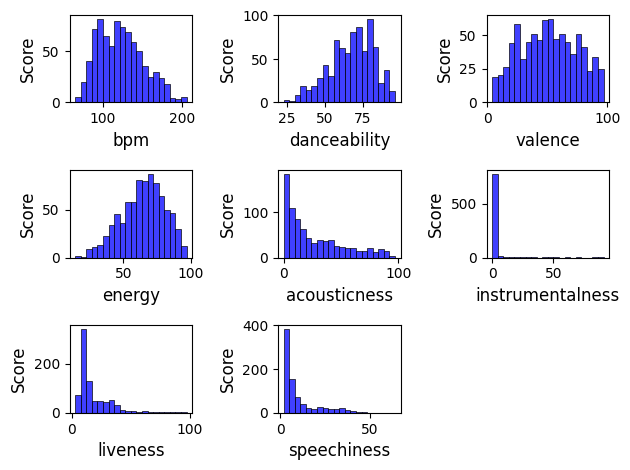

In [ ]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_da, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()
print(correlation_matrix)

                       bpm  danceability   valence    energy  acousticness  \
bpm               1.000000     -0.148174  0.029169  0.013363     -0.010767   
danceability     -0.148174      1.000000  0.389729  0.157970     -0.240454   
valence           0.029169      0.389729  1.000000  0.349736     -0.064072   
energy            0.013363      0.157970  0.349736  1.000000     -0.552637   
acousticness     -0.010767     -0.240454 -0.064072 -0.552637      1.000000   
instrumentalness -0.003407     -0.102144 -0.147032 -0.051662      0.046700   
liveness         -0.005817     -0.100579  0.000142  0.111240     -0.046112   
speechiness       0.038248      0.201189  0.035704 -0.026880     -0.017820   
streams          -0.025694     -0.093268 -0.051014 -0.036499     -0.005751   

                  instrumentalness  liveness  speechiness   streams  
bpm                      -0.003407 -0.005817     0.038248 -0.025694  
danceability             -0.102144 -0.100579     0.201189 -0.093268  
valence  

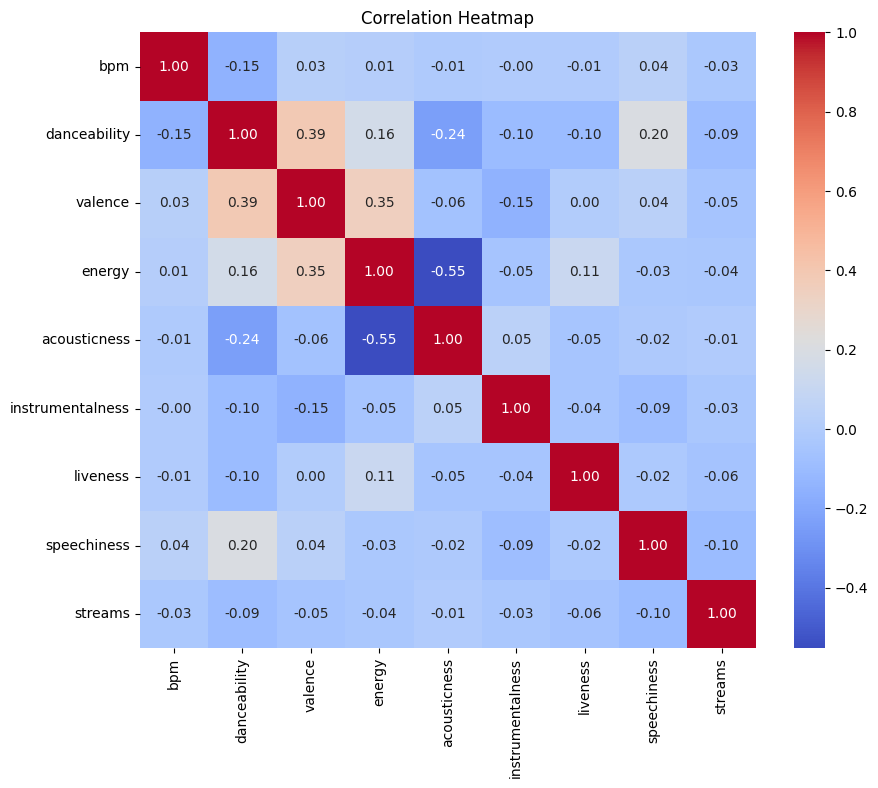

In [ ]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

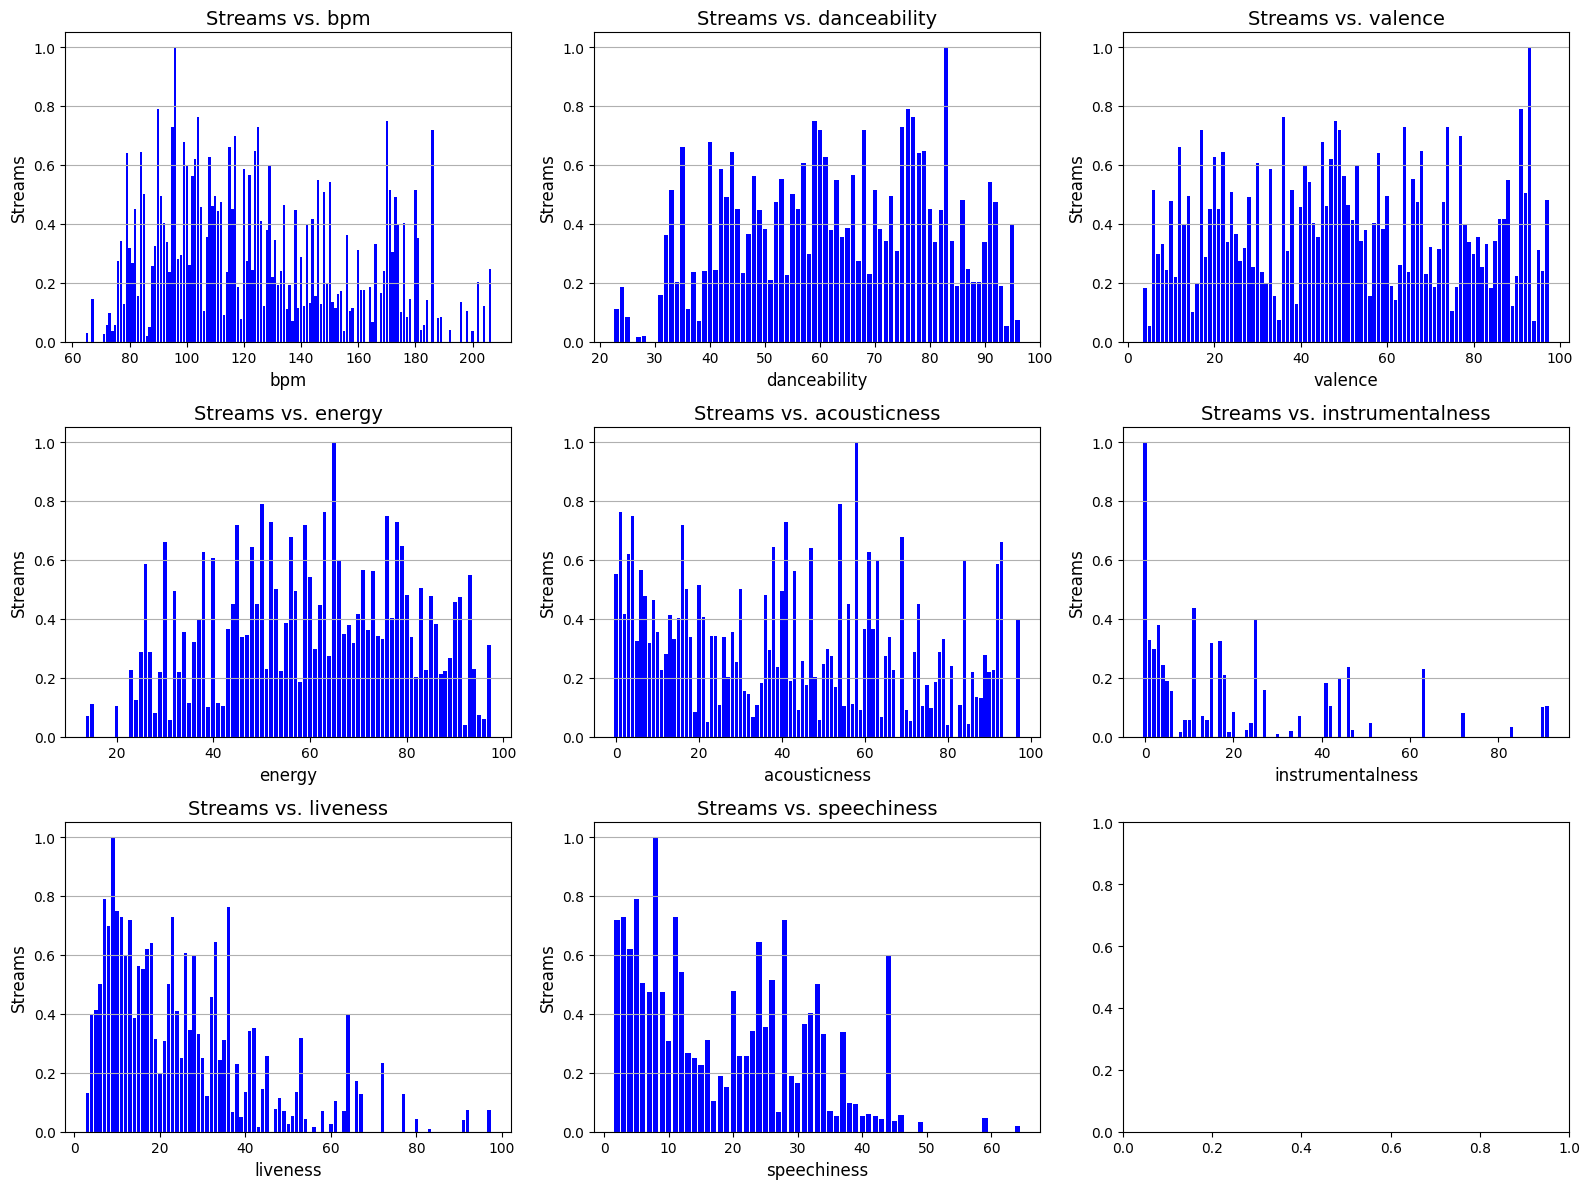

In [ ]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df_da[column], df_da['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-30-f60c1d0b6d84>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


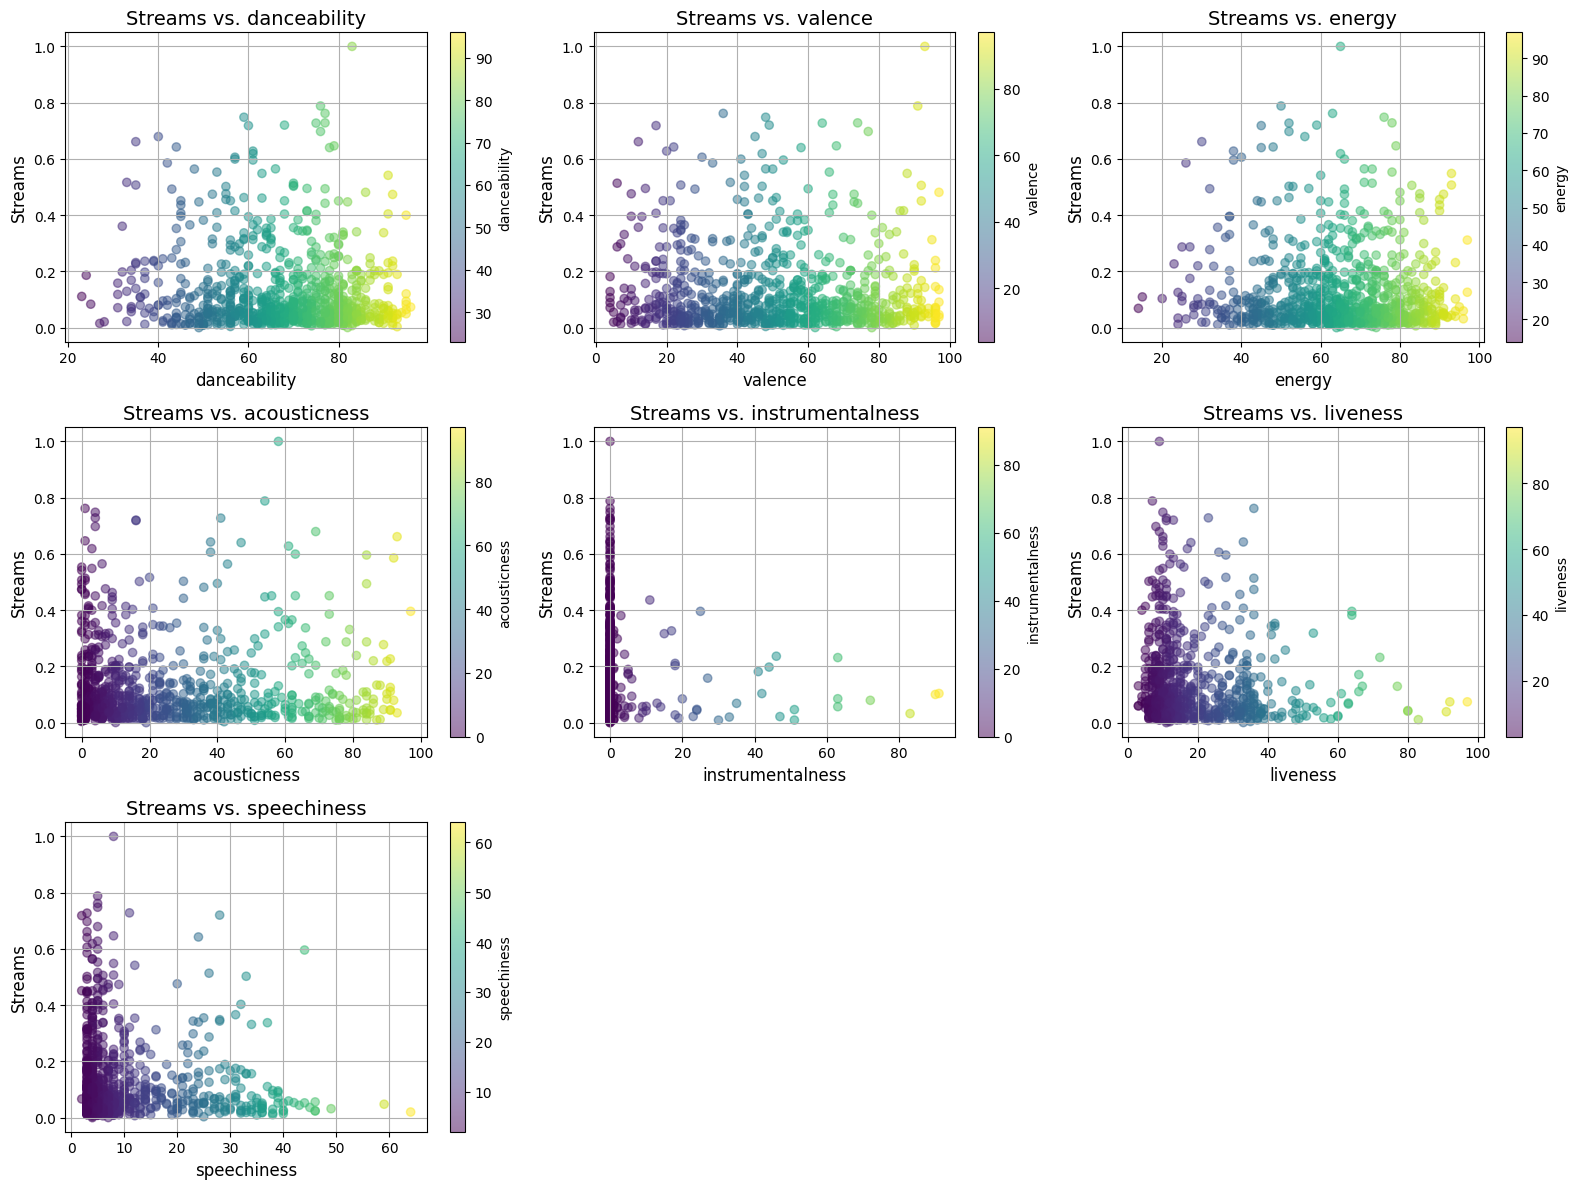

In [ ]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da[column], df_da['streams'], c=df_da[column], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df_da = df_da.merge(df[['key']], left_index=True, right_index=True, how='inner')
df_da.head()

streams    bpm  danceability  valence  energy  acousticness  \
0  0.039685  125.0          80.0     89.0    83.0          31.0   
1  0.037533   92.0          71.0     61.0    74.0           7.0   
2  0.039298  138.0          51.0     32.0    53.0          17.0   
3  0.224794  170.0          55.0     58.0    72.0          11.0   
4  0.085117  144.0          65.0     23.0    80.0          14.0   

   instrumentalness  liveness  speechiness  key_A  ...  key_D  key_D#  key_E  \
0               0.0       8.0          4.0    0.0  ...    0.0     0.0    0.0   
1               0.0      10.0          4.0    0.0  ...    0.0     0.0    0.0   
2               0.0      31.0          6.0    0.0  ...    0.0     0.0    0.0   
3               0.0      11.0         15.0    1.0  ...    0.0     0.0    0.0   
4              63.0      11.0          6.0    1.0  ...    0.0     0.0    0.0   

   key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  key  
0    0.0     0.0    0.0     0.0         1.0         0.0    B  
1    0.0     0.0    0.0     0.0         1.0         0.0   C#  
2    1.0     0.0    0.0     0.0         1.0         0.0    F  
3    0.0     0.0    0.0     0.0         1.0         0.0    A  
4    0.0     0.0    0.0     0.0         0.0         1.0    A  

[5 rows x 23 columns]

<ipython-input-32-64283f2ac7e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="key", x="streams", data=df_da, aspect=2, palette=palette)


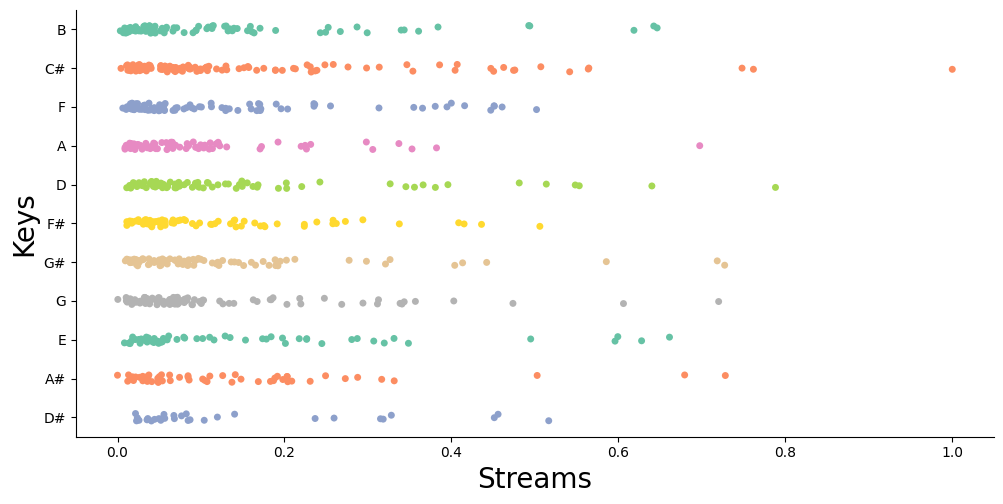

In [ ]:
palette = sns.color_palette("Set2", len(df_da['key'].unique()))

sns.catplot(y="key", x="streams", data=df_da, aspect=2, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.show()

<ipython-input-33-5d24111f15b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="key", x="streams", data=df_da, order=sorted_keys, palette=palette)


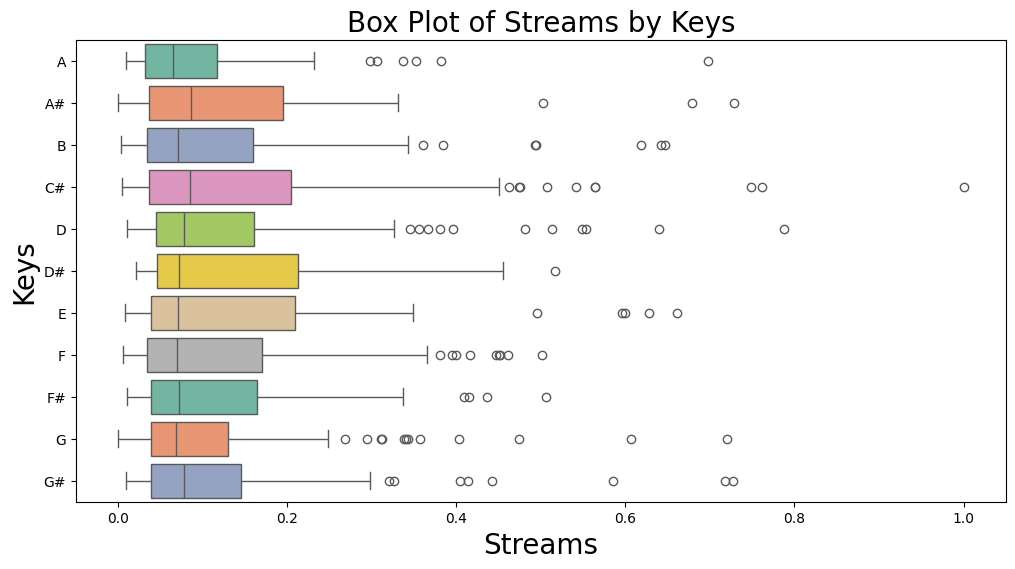

In [ ]:
palette = sns.color_palette("Set2", len(df_da['key'].unique()))

sorted_keys = sorted(df_da['key'].unique())
plt.figure(figsize=(12, 6))
sns.boxplot(y="key", x="streams", data=df_da, order=sorted_keys, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys", fontsize=20)
plt.show()

<ipython-input-34-a54a33d90b58>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="key", x="streams", data=df_da, order=average_streams, palette=palette)


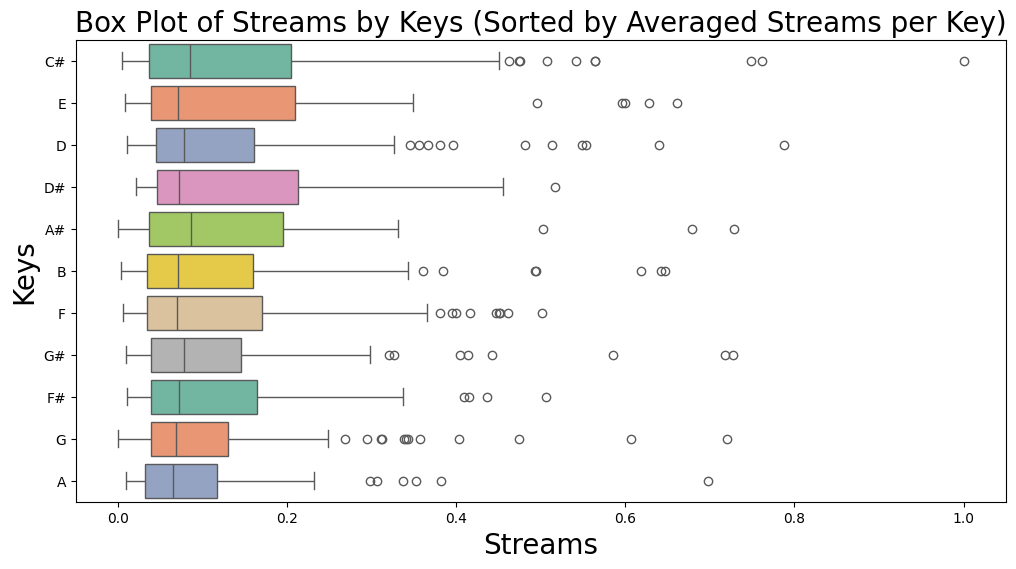

In [ ]:
average_streams = df_da.groupby('key')['streams'].mean().sort_values(ascending=False).index.tolist()

palette = sns.color_palette("Set2", len(average_streams))

plt.figure(figsize=(12, 6))
sns.boxplot(y="key", x="streams", data=df_da, order=average_streams, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys (Sorted by Averaged Streams per Key)", fontsize=20)
plt.show()

<ipython-input-35-b02d0b801f76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="key", data=df_da, palette="Set2")


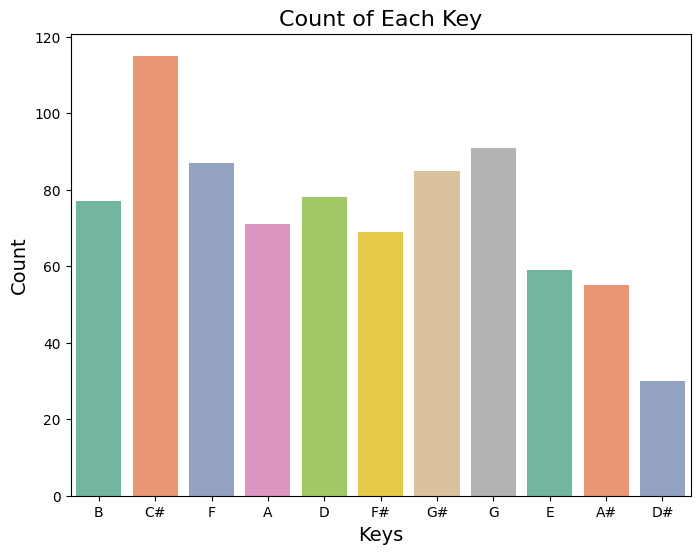

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="key", data=df_da, palette="Set2")
plt.xlabel("Keys", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Each Key", fontsize=16)
plt.show()

In [ ]:
key_counts = df_da['key'].value_counts().reset_index()
key_counts.columns = ['Key', 'Count']

total_count_key = key_counts['Count'].sum()
total_row = pd.DataFrame({'Key': ['Total'], 'Count': [total_count_key]})
key_counts = pd.concat([key_counts, total_row])

#------------------------

total_counts = df_da['key'].count()

is_equal = total_counts == key_counts[key_counts['Key'] == 'Total']['Count'].values[0]
print("Is total_count equal to 'Total'Key? ", is_equal)

print("Total count of values in the 'key' column:", total_counts)
print(key_counts)


Is total_count equal to 'Total'Key?  True
Total count of values in the 'key' column: 817
      Key  Count
0      C#    115
1       G     91
2       F     87
3      G#     85
4       D     78
5       B     77
6       A     71
7      F#     69
8       E     59
9      A#     55
10     D#     30
0   Total    817


In [ ]:
key_counts = key_counts[key_counts['Key'] != 'Total']
key_counts.info

<bound method DataFrame.info of    Key  Count
0   C#    115
1    G     91
2    F     87
3   G#     85
4    D     78
5    B     77
6    A     71
7   F#     69
8    E     59
9   A#     55
10  D#     30>

In [ ]:
df_da.columns = df_da.columns.str.lower()
key_counts.columns = key_counts.columns.str.lower()

In [ ]:
merged_df = key_counts.merge(df_da, on='key')
result_df = merged_df.groupby('key')['streams'].agg(['mean', 'min', 'max']).reset_index()
result_df = result_df.rename(columns={'mean': 'avg_streams', 'min': 'min_streams', 'max': 'max_streams'})

In [ ]:
result_df.head()

key  avg_streams  min_streams  max_streams
0   A     0.102236     0.008946     0.697483
1  A#     0.139584     0.000000     0.728142
2   B     0.132506     0.003355     0.646457
3  C#     0.154569     0.004148     1.000000
4   D     0.142798     0.011011     0.788228

In [ ]:
sorted_df = df_da.sort_values(by='streams')
lowest_10 = sorted_df.head(10)

print("10 Lowest Values:")
print(lowest_10[['key', 'streams']])


10 Lowest Values:
    key   streams
123  A#  0.000000
393   G  0.000382
142   B  0.003355
68   C#  0.004148
30    F  0.006338
248   B  0.007010
104   E  0.008297
193   B  0.008517
150   A  0.008946
577   A  0.008970


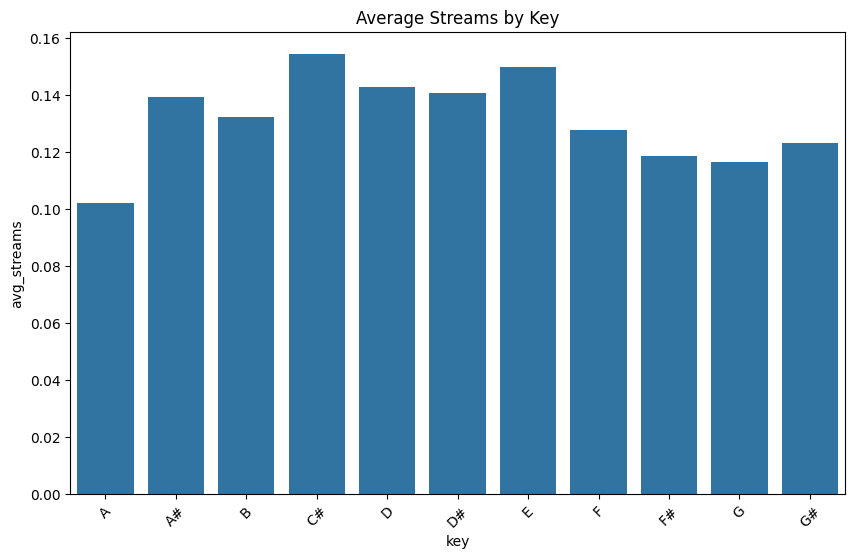

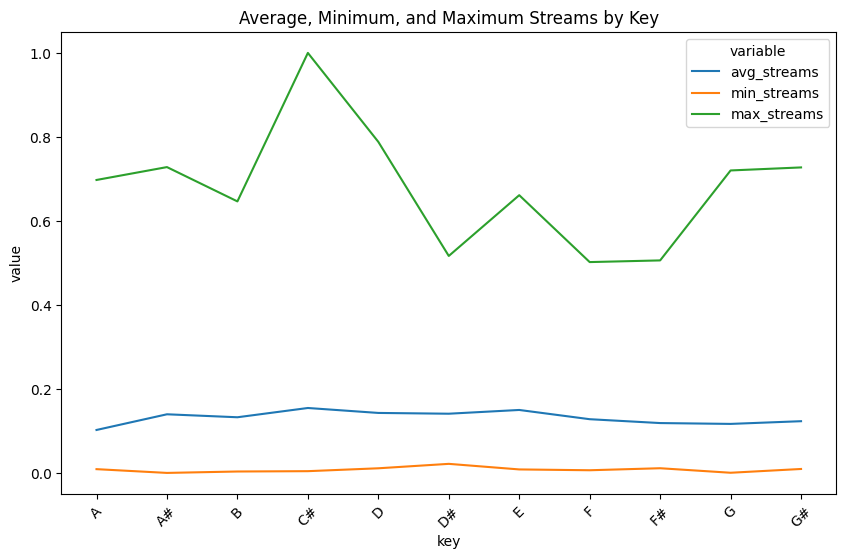

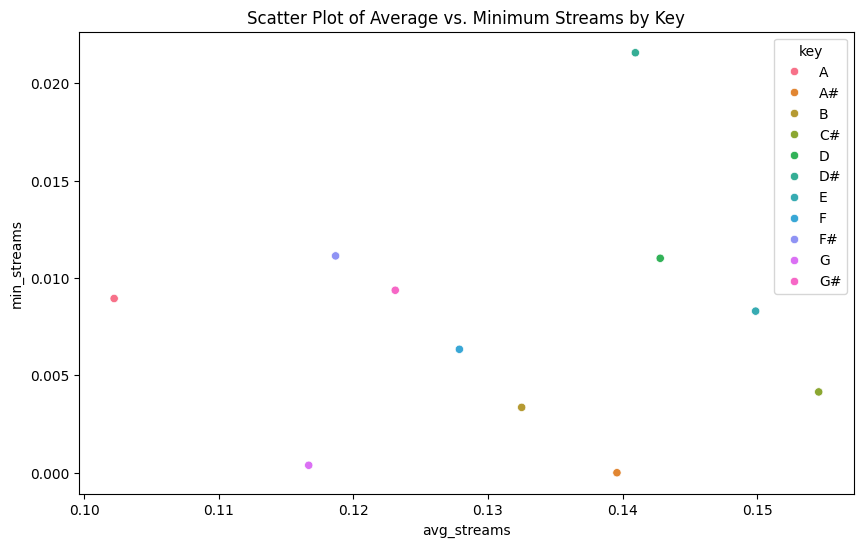

In [ ]:
# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='key', y='avg_streams', data=result_df)
plt.title('Average Streams by Key')
plt.xticks(rotation=45)
plt.show()

# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='key', y='value', hue='variable', data=pd.melt(result_df, id_vars='key'))
plt.title('Average, Minimum, and Maximum Streams by Key')
plt.xticks(rotation=45)
plt.show()

# Scat Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_streams', y='min_streams', hue='key', data=result_df)
plt.title('Scatter Plot of Average vs. Minimum Streams by Key')
plt.show()



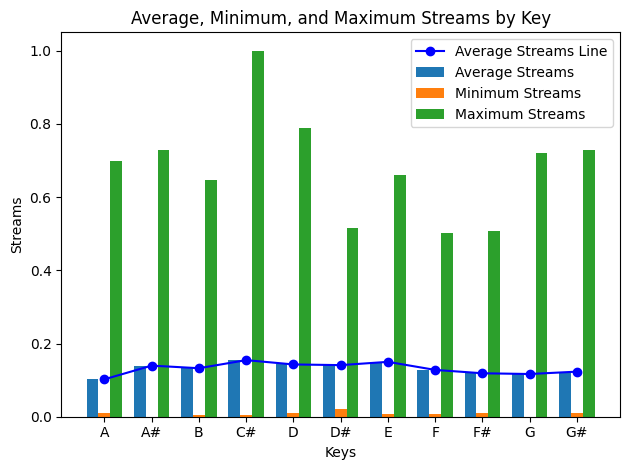

In [ ]:
keys = result_df['key']
avg_streams = result_df['avg_streams']
min_streams = result_df['min_streams']
max_streams = result_df['max_streams']

bar_width = 0.25

# indexes x-axis
x_indexes = np.arange(len(keys))

plt.bar(x_indexes - bar_width, avg_streams, width=bar_width, label='Average Streams')
plt.bar(x_indexes, min_streams, width=bar_width, label='Minimum Streams')
plt.bar(x_indexes + bar_width, max_streams, width=bar_width, label='Maximum Streams')

plt.plot(x_indexes, avg_streams, marker='o', linestyle='-', color='b', label='Average Streams Line')
plt.xticks(x_indexes, keys)
plt.xlabel('Keys')
plt.ylabel('Streams')
plt.title('Average, Minimum, and Maximum Streams by Key')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df_da.columns

Index(['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'key_a', 'key_a#',
       'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#',
       'key_g', 'key_g#', 'mode_major', 'mode_minor', 'key'],
      dtype='object')

In [ ]:
df_da.shape

(817, 23)

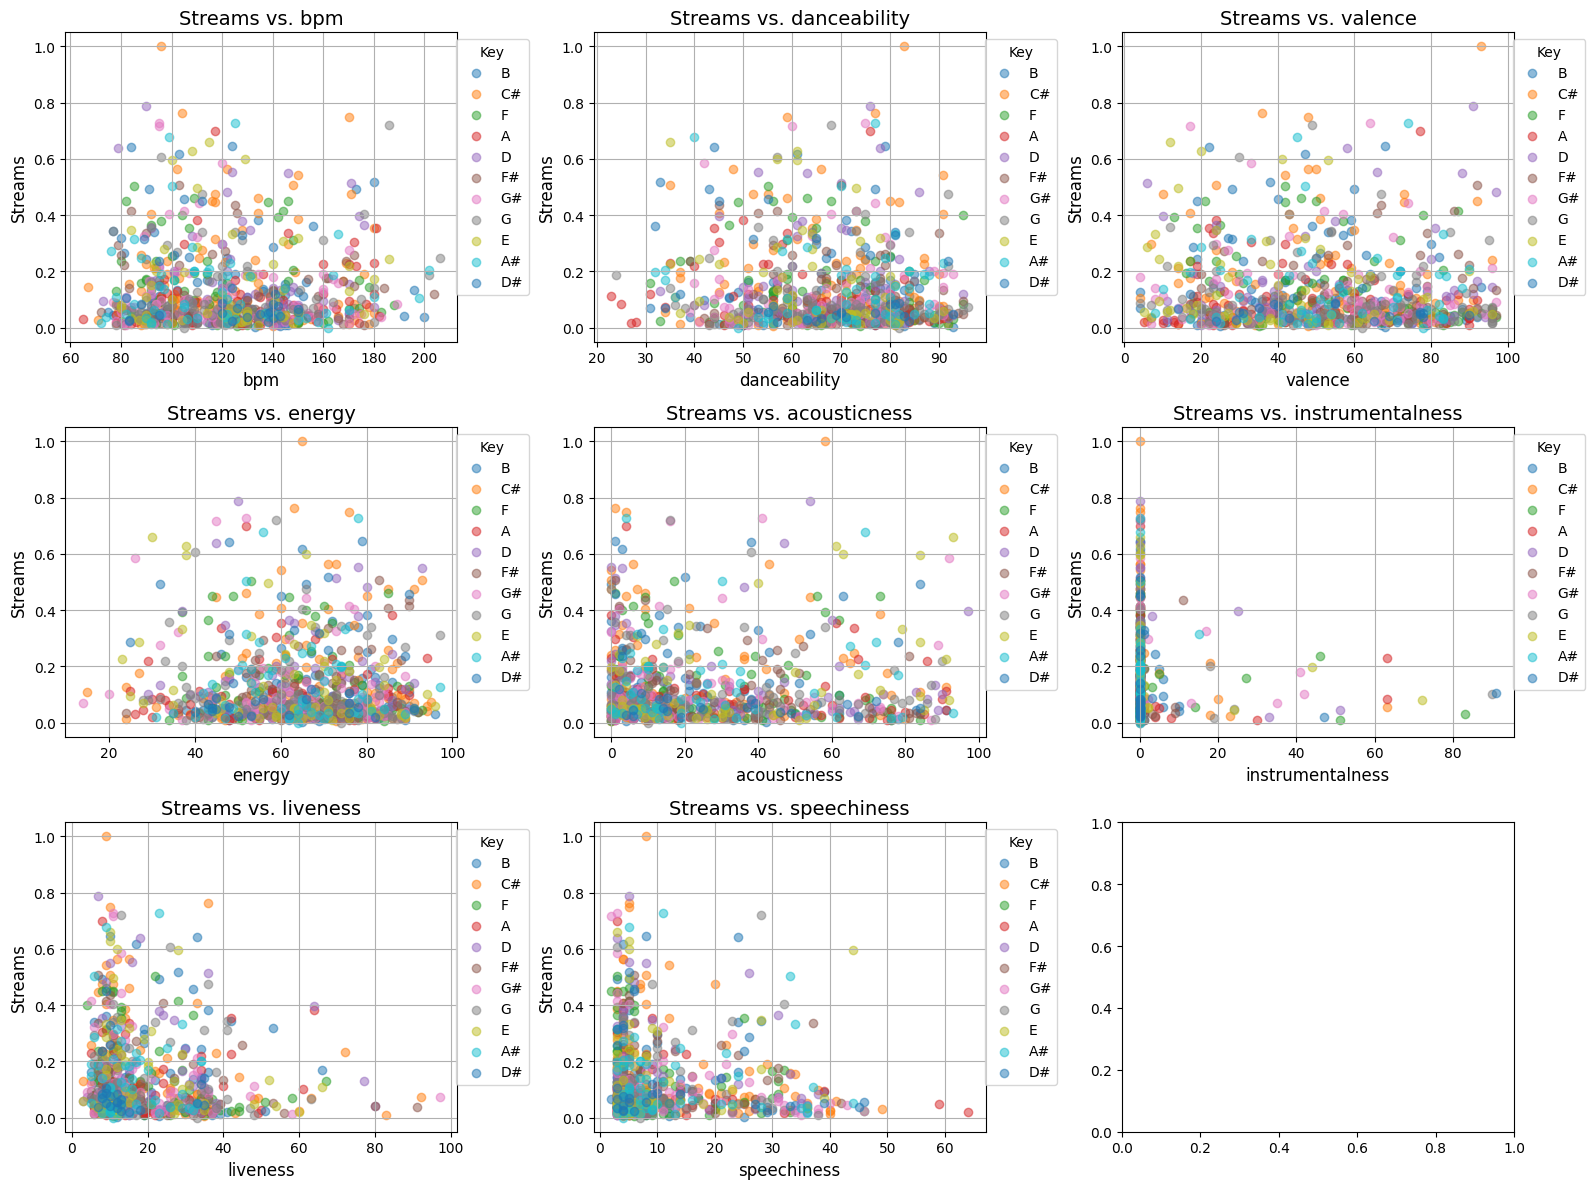

In [ ]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

unique_keys = df_da['key'].unique()

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    for key in unique_keys:
        plt.sca(axes[i])
        plt.scatter(df_da[df_da['key'] == key][column], df_da[df_da['key'] == key]['streams'], label=key, alpha=0.5)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Streams', fontsize=12)
        plt.title(f'Streams vs. {column}', fontsize=14)
        plt.grid(True)
        plt.legend(title='Key', loc='upper right', bbox_to_anchor=(1.2, 1))

for j in range(len(unique_keys), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


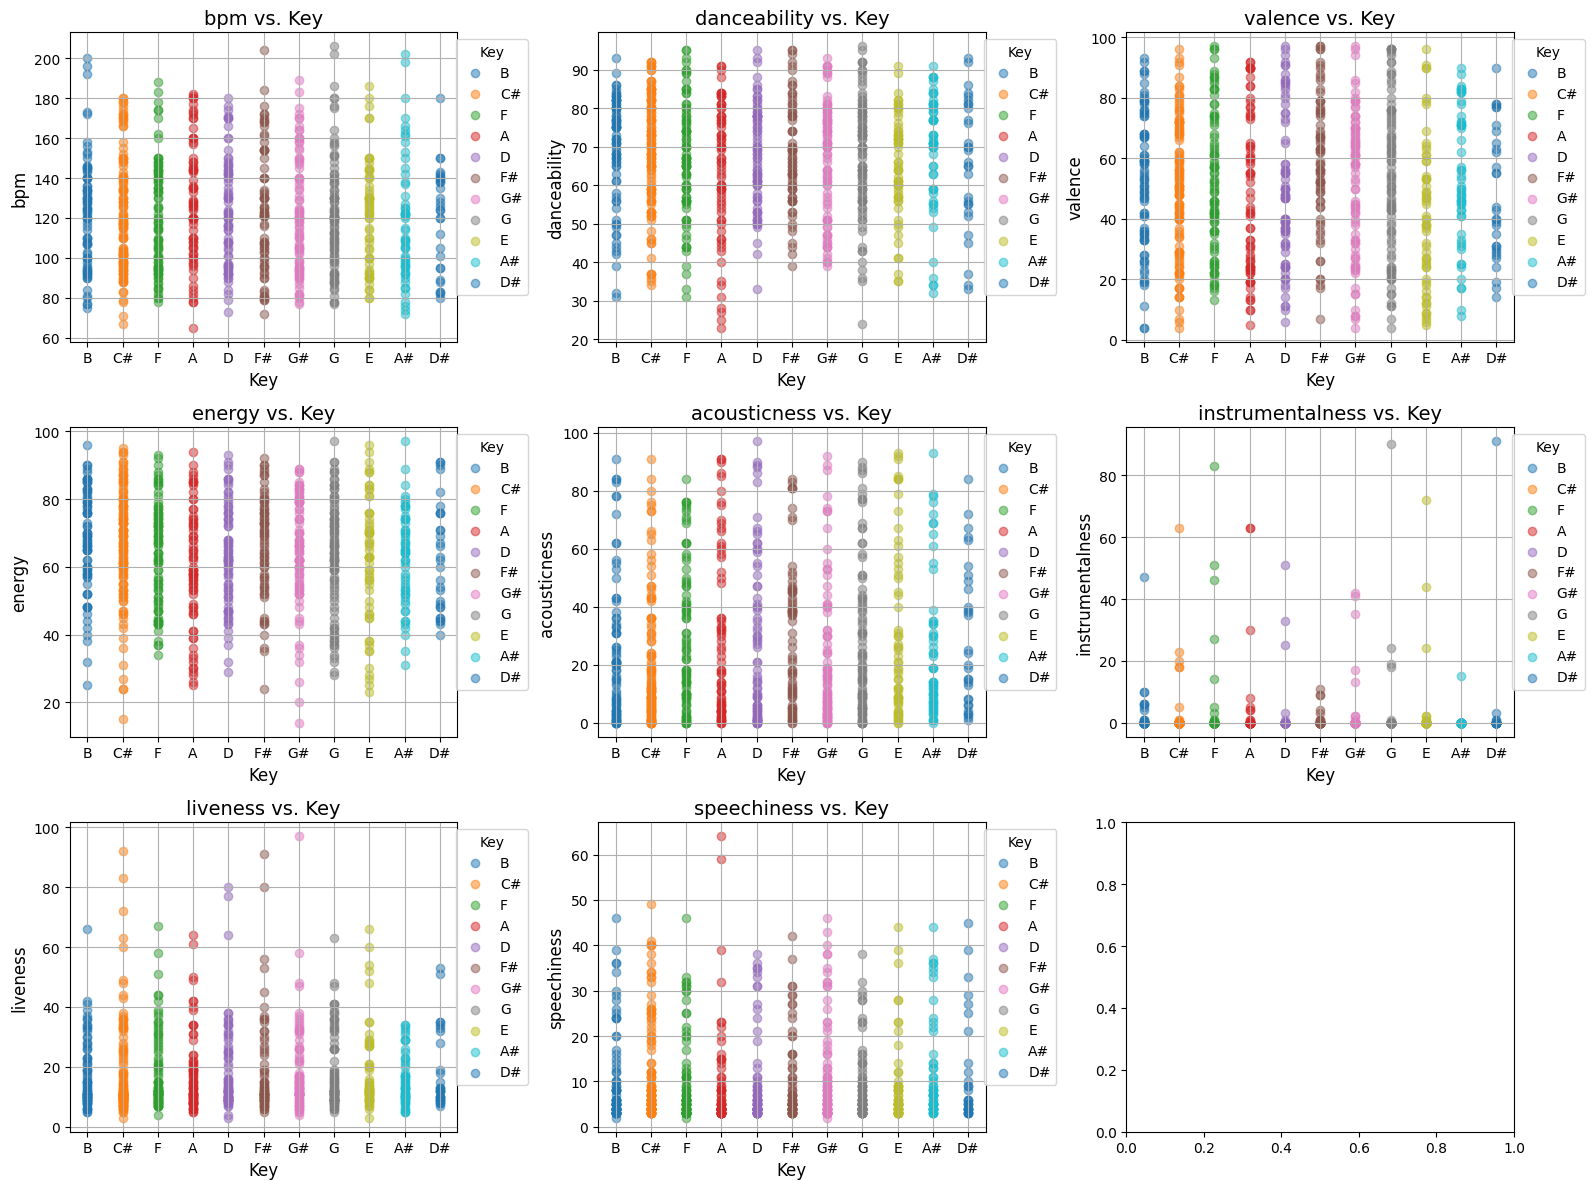

In [ ]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

unique_keys = df_da['key'].unique()

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    for key in unique_keys:
        plt.sca(axes[i])
        plt.scatter(df_da[df_da['key'] == key]['key'], df_da[df_da['key'] == key][column], label=key, alpha=0.5)
        plt.xlabel('Key', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.title(f'{column} vs. Key', fontsize=14)
        plt.grid(True)
        plt.legend(title='Key', loc='upper right', bbox_to_anchor=(1.2, 1))

for j in range(len(unique_keys), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-48-e45d38b0de44>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


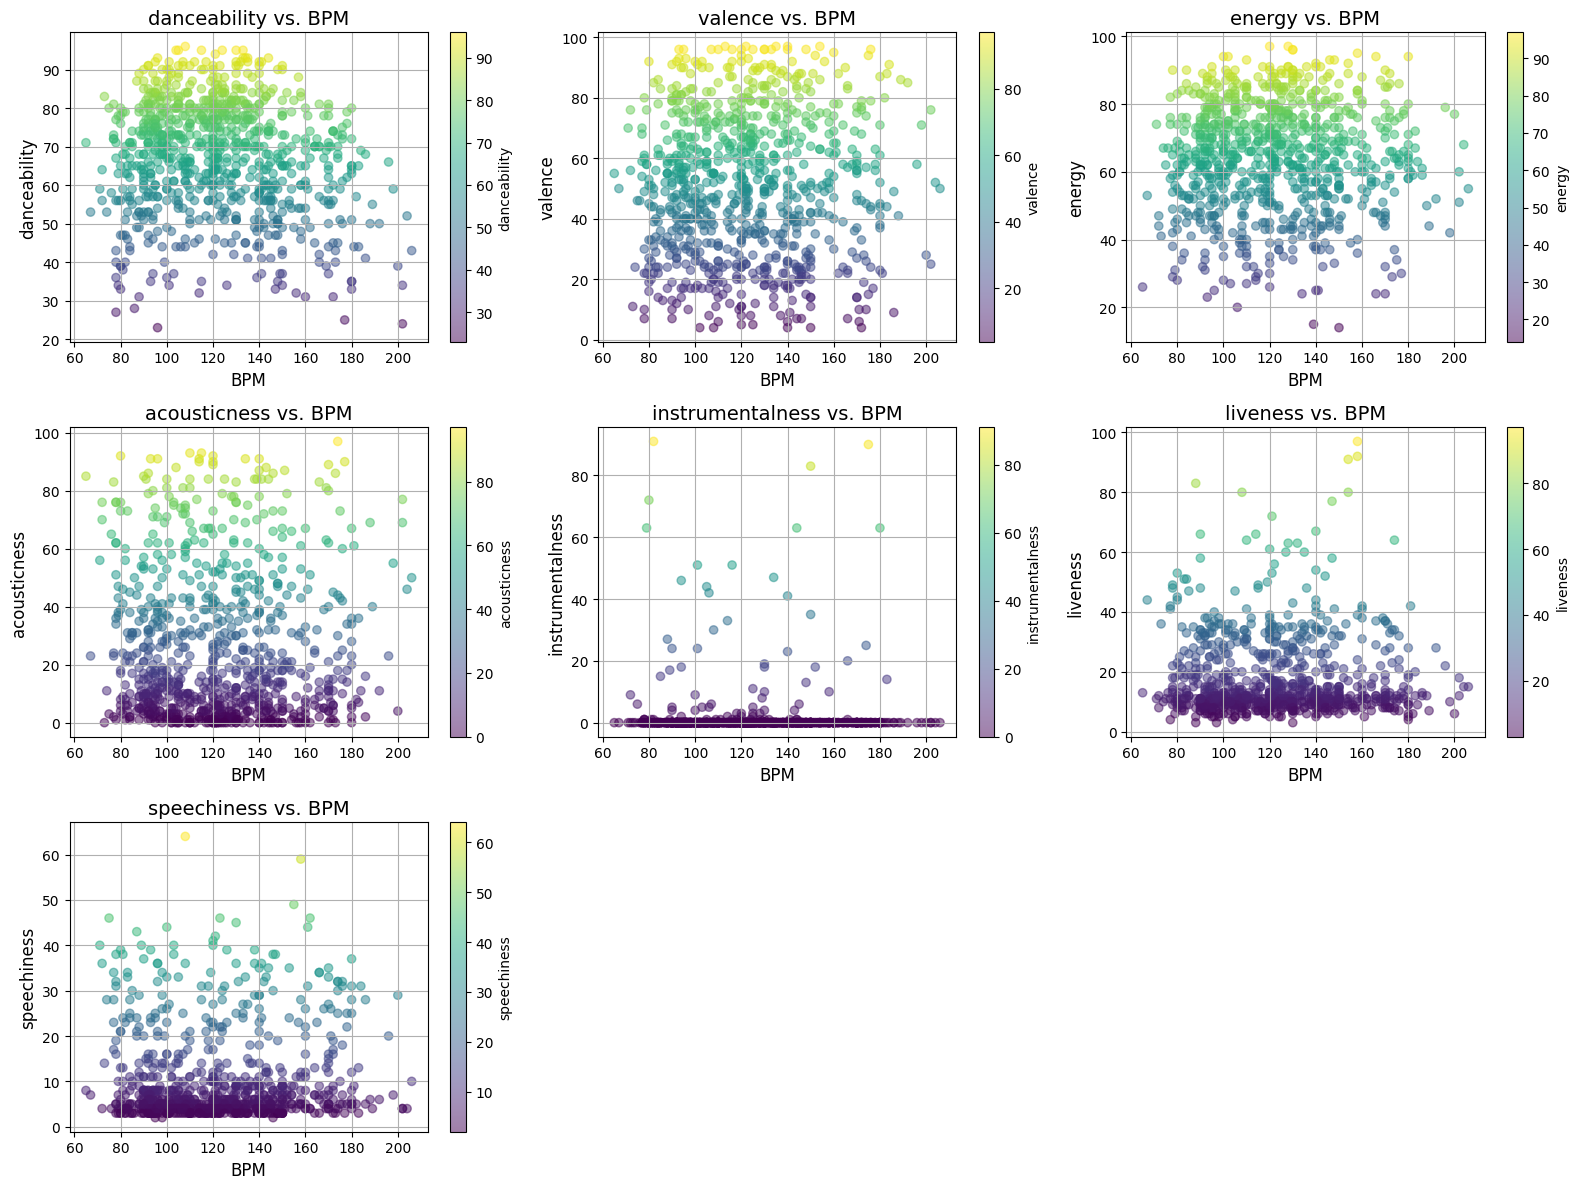

In [ ]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da['bpm'], df_da[column], c=df_da[column], cmap=colormap, alpha=0.5)

    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. BPM', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-49-2c98bb907218>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


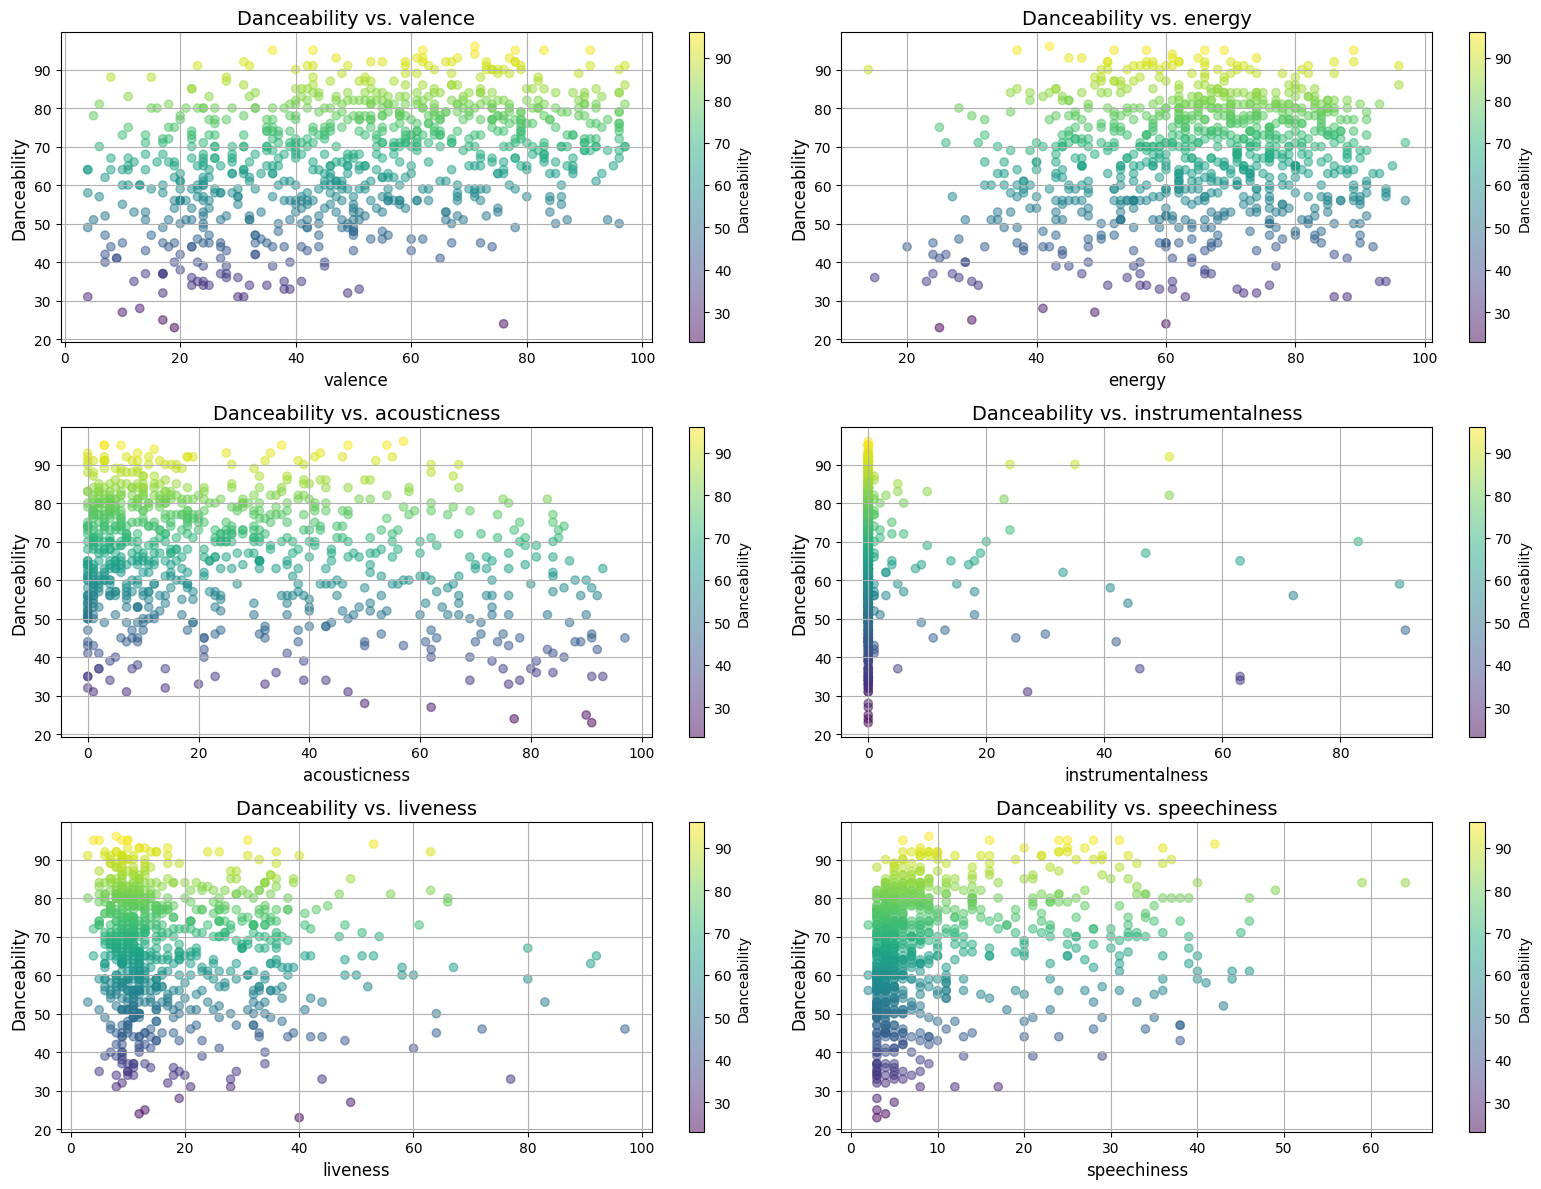

In [ ]:
columns_to_plot = ['valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da[column], df_da['danceability'], c=df_da['danceability'], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Danceability', fontsize=12)
    plt.title(f'Danceability vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Danceability')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-50-b51654edbccd>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


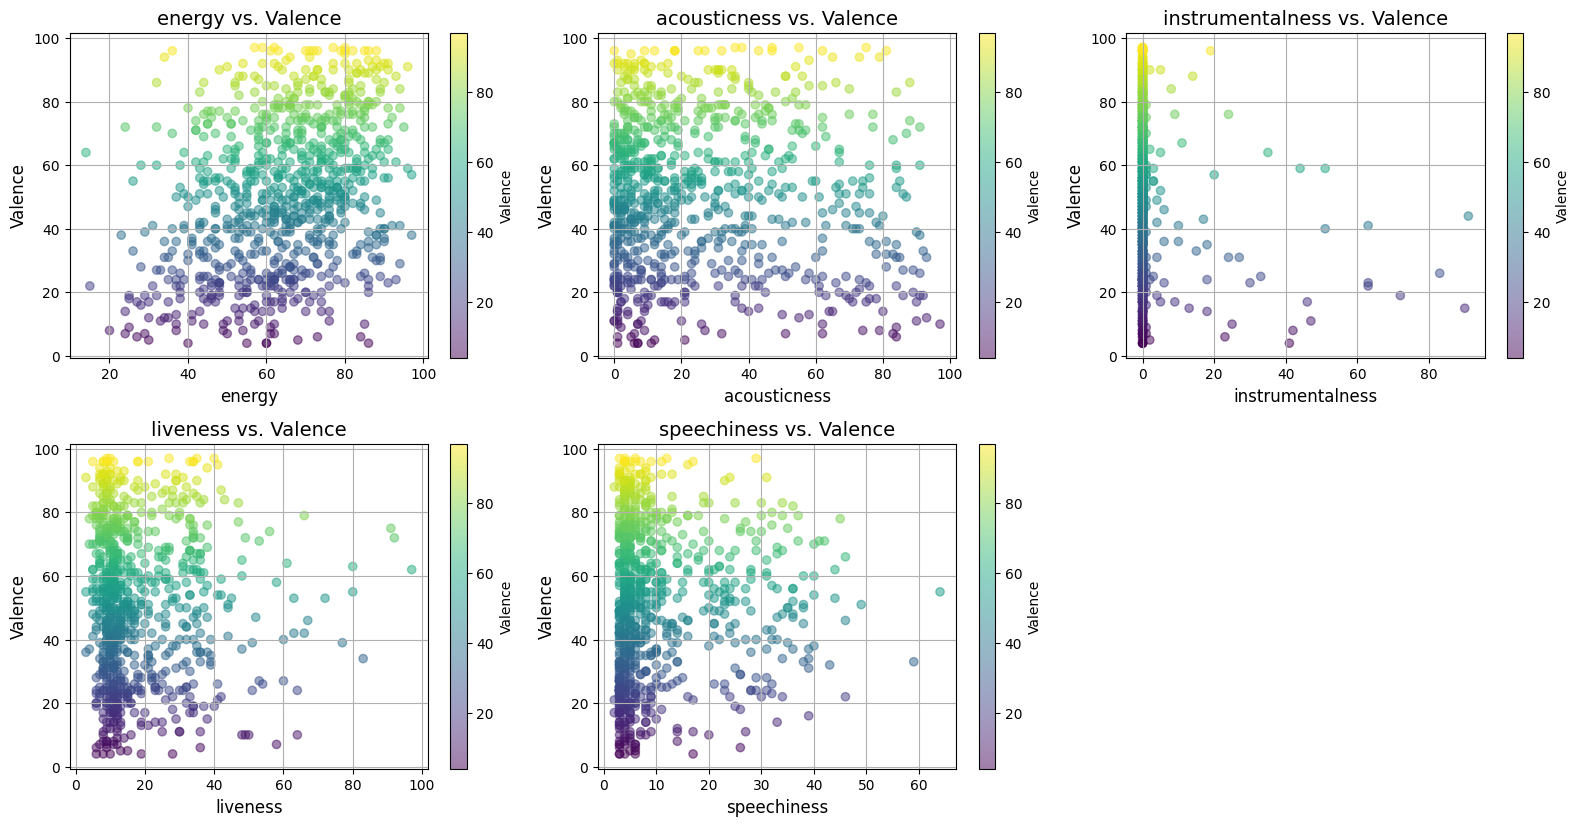

In [ ]:
columns_to_plot = ['energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da[column], df_da['valence'], c=df_da['valence'], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Valence', fontsize=12)
    plt.title(f'{column} vs. Valence', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Valence')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-51-cd200cc44936>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


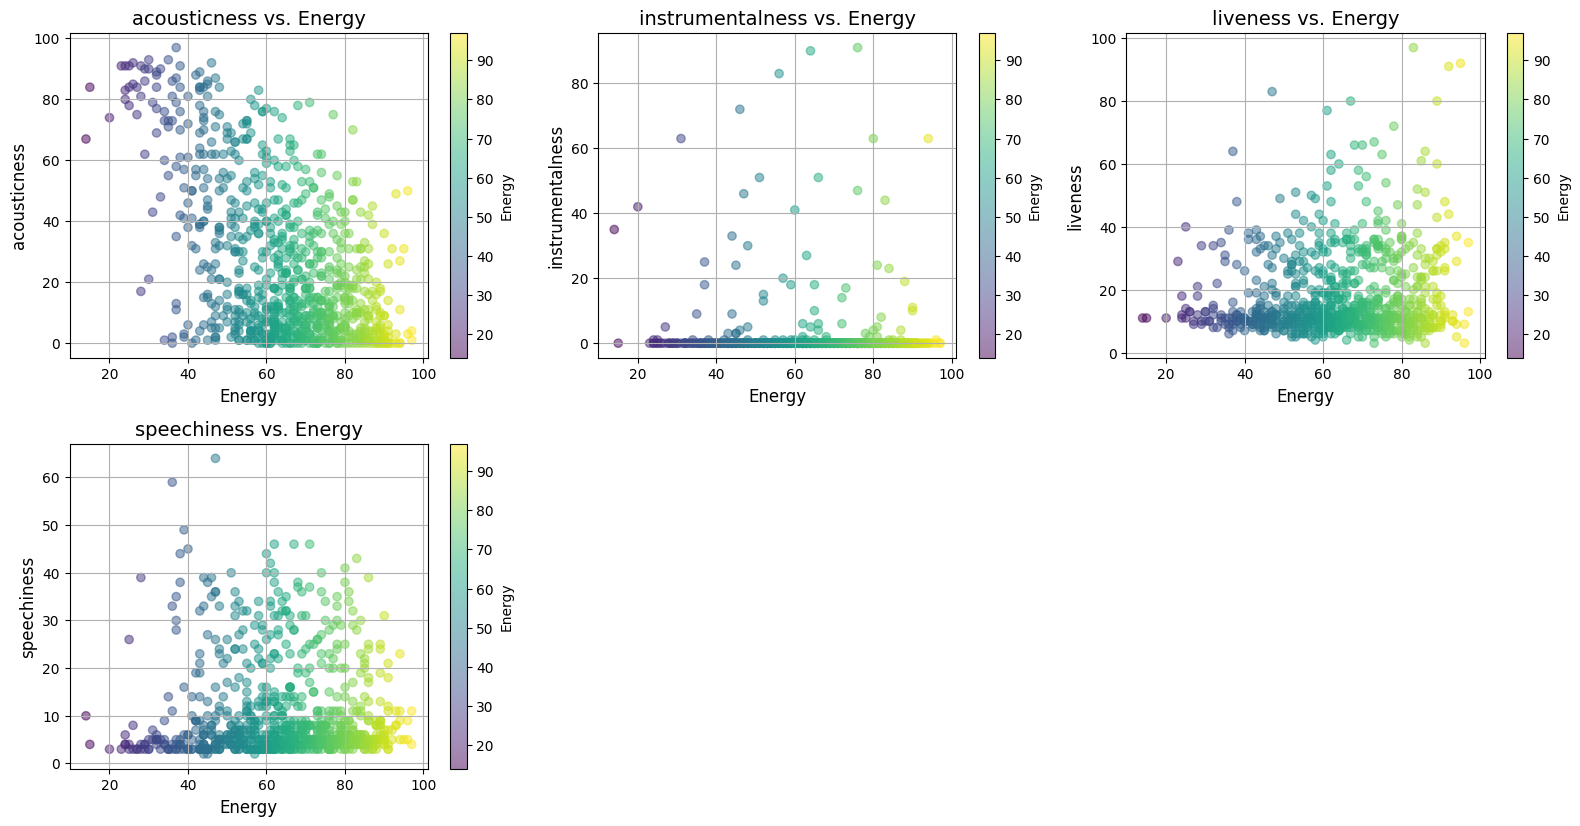

In [ ]:
columns_to_plot = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da['energy'], df_da[column], c=df_da['energy'], cmap=colormap, alpha=0.5)

    plt.xlabel('Energy', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Energy', fontsize=14)
    plt.grid(True)

    plt.colorbar(scatter, label='Energy')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-52-2f9e6c8815d2>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


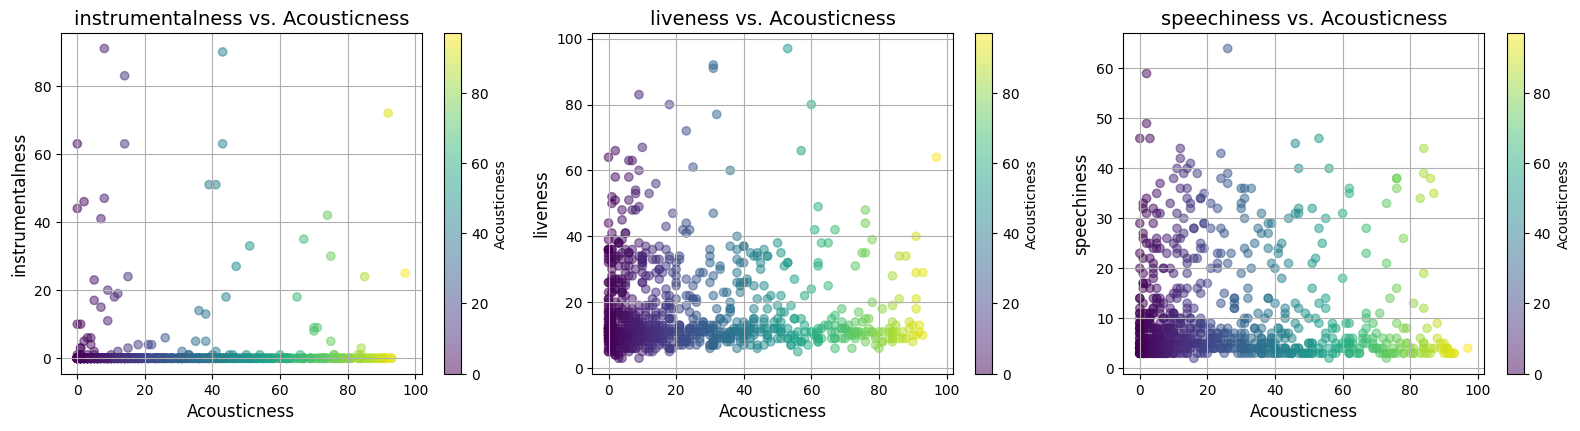

In [ ]:
columns_to_plot = ['instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da['acousticness'], df_da[column], c=df_da['acousticness'], cmap=colormap, alpha=0.5)

    plt.xlabel('Acousticness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Acousticness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Acousticness')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-53-4688339a26ee>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


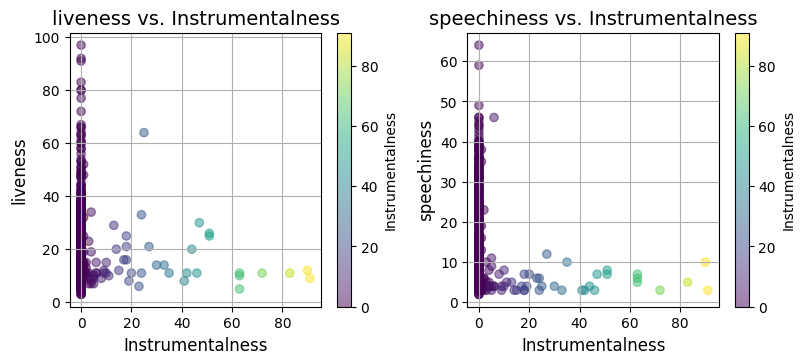

In [ ]:
columns_to_plot = ['liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da['instrumentalness'], df_da[column], c=df_da['instrumentalness'], cmap=colormap, alpha=0.5)

    plt.xlabel('Instrumentalness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Instrumentalness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Instrumentalness')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-54-2d666d3710b7>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis')


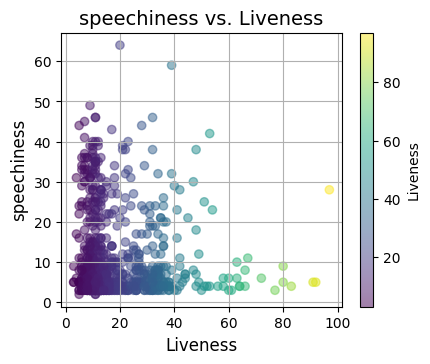

In [ ]:
columns_to_plot = ['speechiness']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    scatter = plt.scatter(df_da['liveness'], df_da[column], c=df_da['liveness'], cmap=colormap, alpha=0.5)

    plt.xlabel('Liveness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Liveness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Liveness')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


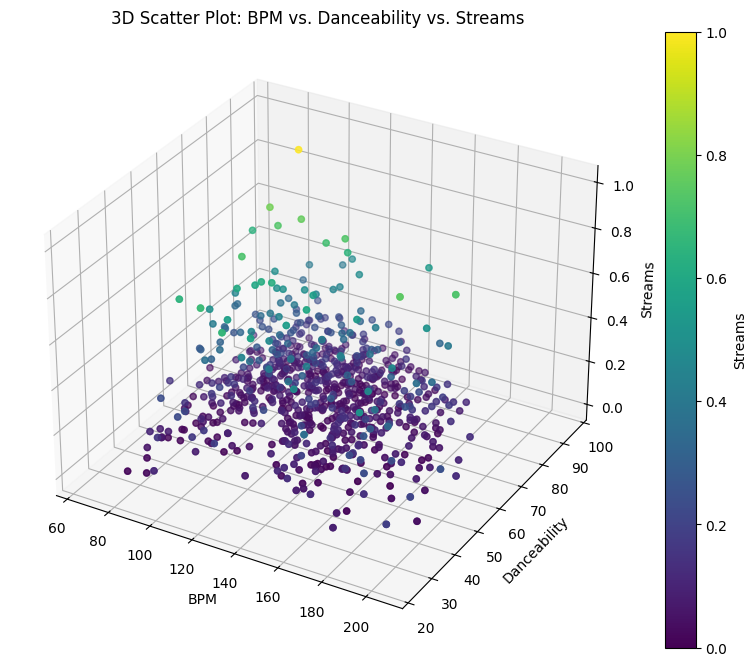

In [ ]:
bpm = df_da['bpm']
danceability = df_da['danceability']
streams = df_da['streams']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(bpm, danceability, streams, c=streams, cmap='viridis', marker='o')
ax.set_xlabel('BPM')
ax.set_ylabel('Danceability')
ax.set_zlabel('Streams')

cbar = fig.colorbar(ax.scatter(bpm, danceability, streams, c=streams, cmap='viridis', marker='o'), ax=ax)
cbar.set_label('Streams', rotation=90)
plt.title('3D Scatter Plot: BPM vs. Danceability vs. Streams')
plt.show()

In [ ]:
df_da.columns

Index(['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'key_a', 'key_a#',
       'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#',
       'key_g', 'key_g#', 'mode_major', 'mode_minor', 'key'],
      dtype='object')

In [ ]:
top_10_songs = df_da.nlargest(10, 'streams')
top_10_songs.describe()

streams         bpm  danceability    valence     energy  \
count  10.000000   10.000000     10.000000  10.000000  10.000000   
mean    0.756917  117.700000     69.100000  59.400000  59.600000   
std     0.090825   33.764051     12.827488  24.636017  10.966616   
min     0.679419   90.000000     40.000000  17.000000  45.000000   
25%     0.718876   95.250000     62.000000  45.750000  52.000000   
50%     0.727747  101.500000     75.500000  56.500000  57.500000   
75%     0.758384  123.000000     76.750000  76.250000  64.500000   
max     1.000000  186.000000     83.000000  93.000000  78.000000   

       acousticness  instrumentalness   liveness  speechiness      key_a  ...  \
count     10.000000              10.0  10.000000    10.000000  10.000000  ...   
mean      26.700000               0.0  13.700000     7.500000   0.100000  ...   
std       26.149357               0.0   9.031427     7.663043   0.316228  ...   
min        1.000000               0.0   7.000000     2.000000   0.000000  ...   
25%        4.000000               0.0   9.000000     3.500000   0.000000  ...   
50%       16.000000               0.0  10.500000     5.000000   0.000000  ...   
75%       50.750000               0.0  12.500000     7.250000   0.000000  ...   
max       69.000000               0.0  36.000000    28.000000   1.000000  ...   

          key_c#      key_d  key_d#  key_e  key_f  key_f#      key_g  \
count  10.000000  10.000000    10.0   10.0   10.0    10.0  10.000000   
mean    0.300000   0.100000     0.0    0.0    0.0     0.0   0.100000   
std     0.483046   0.316228     0.0    0.0    0.0     0.0   0.316228   
min     0.000000   0.000000     0.0    0.0    0.0     0.0   0.000000   
25%     0.000000   0.000000     0.0    0.0    0.0     0.0   0.000000   
50%     0.000000   0.000000     0.0    0.0    0.0     0.0   0.000000   
75%     0.750000   0.000000     0.0    0.0    0.0     0.0   0.000000   
max     1.000000   1.000000     0.0    0.0    0.0     0.0   1.000000   

          key_g#  mode_major  mode_minor  
count  10.000000   10.000000   10.000000  
mean    0.200000    0.700000    0.300000  
std     0.421637    0.483046    0.483046  
min     0.000000    0.000000    0.000000  
25%     0.000000    0.250000    0.000000  
50%     0.000000    1.000000    0.000000  
75%     0.000000    1.000000    0.750000  
max     1.000000    1.000000    1.000000  

[8 rows x 22 columns]

In [ ]:
top_50_songs = df_da.nlargest(50, 'streams')
top_50_songs.describe()

streams         bpm  danceability    valence     energy  \
count  50.000000   50.000000     50.000000  50.000000  50.000000   
mean    0.567438  120.020000     63.000000  50.640000  62.820000   
std     0.120800   27.039268     15.126676  24.746684  17.558869   
min     0.415812   79.000000     33.000000   6.000000  26.000000   
25%     0.473901  100.500000     53.500000  33.750000  50.500000   
50%     0.529135  115.500000     62.000000  48.000000  64.000000   
75%     0.641862  132.750000     76.000000  67.750000  77.500000   
max     1.000000  186.000000     92.000000  97.000000  93.000000   

       acousticness  instrumentalness   liveness  speechiness      key_a  ...  \
count     50.000000         50.000000  50.000000    50.000000  50.000000  ...   
mean      27.800000          0.220000  15.080000     7.960000   0.020000  ...   
std       29.151259          1.555635   8.766448     8.621189   0.141421  ...   
min        0.000000          0.000000   6.000000     2.000000   0.000000  ...   
25%        3.000000          0.000000   9.000000     3.000000   0.000000  ...   
50%       16.000000          0.000000  11.000000     5.000000   0.000000  ...   
75%       52.250000          0.000000  17.750000     7.750000   0.000000  ...   
max       93.000000         11.000000  36.000000    44.000000   1.000000  ...   

          key_c#      key_d     key_d#      key_e      key_f     key_f#  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean    0.240000   0.120000   0.060000   0.100000   0.120000   0.040000   
std     0.431419   0.328261   0.239898   0.303046   0.328261   0.197949   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

           key_g     key_g#  mode_major  mode_minor  
count  50.000000  50.000000   50.000000   50.000000  
mean    0.060000   0.080000    0.680000    0.320000  
std     0.239898   0.274048    0.471212    0.471212  
min     0.000000   0.000000    0.000000    0.000000  
25%     0.000000   0.000000    0.000000    0.000000  
50%     0.000000   0.000000    1.000000    0.000000  
75%     0.000000   0.000000    1.000000    1.000000  
max     1.000000   1.000000    1.000000    1.000000  

[8 rows x 22 columns]

In [ ]:
top_100_songs = df_da.nlargest(100, 'streams')
top_100_songs.describe()


streams        bpm  danceability     valence      energy  \
count  100.000000  100.00000    100.000000  100.000000  100.000000   
mean     0.460157  121.12000     64.090000   48.770000   64.250000   
std      0.139334   28.95077     14.119329   23.744794   16.340676   
min      0.299106   77.00000     32.000000    6.000000   26.000000   
25%      0.346360   98.25000     55.000000   28.000000   52.000000   
50%      0.415498  117.00000     64.000000   47.500000   66.000000   
75%      0.522861  142.50000     75.000000   66.250000   76.250000   
max      1.000000  186.00000     95.000000   97.000000   97.000000   

       acousticness  instrumentalness    liveness  speechiness       key_a  \
count    100.000000         100.00000  100.000000   100.000000  100.000000   
mean      24.860000           0.73000   17.590000     8.840000    0.050000   
std       27.221137           3.50715   12.386124     9.205532    0.219043   
min        0.000000           0.00000    4.000000     2.000000    0.000000   
25%        3.000000           0.00000    9.000000     4.000000    0.000000   
50%       13.000000           0.00000   12.500000     5.000000    0.000000   
75%       41.500000           0.00000   23.000000     9.000000    0.000000   
max       97.000000          25.00000   64.000000    44.000000    1.000000   

       ...      key_c#       key_d      key_d#       key_e       key_f  \
count  ...  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   ...    0.180000    0.120000    0.060000    0.090000    0.120000   
std    ...    0.386123    0.326599    0.238683    0.287623    0.326599   
min    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
50%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
75%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
max    ...    1.000000    1.000000    1.000000    1.000000    1.000000   

           key_f#       key_g     key_g#  mode_major  mode_minor  
count  100.000000  100.000000  100.00000  100.000000  100.000000  
mean     0.050000    0.100000    0.08000    0.640000    0.360000  
std      0.219043    0.301511    0.27266    0.482418    0.482418  
min      0.000000    0.000000    0.00000    0.000000    0.000000  
25%      0.000000    0.000000    0.00000    0.000000    0.000000  
50%      0.000000    0.000000    0.00000    1.000000    0.000000  
75%      0.000000    0.000000    0.00000    1.000000    1.000000  
max      1.000000    1.000000    1.00000    1.000000    1.000000  

[8 rows x 22 columns]

In [ ]:
df_da.shape

(817, 23)

In [ ]:
top_200_songs = df_da.nlargest(200, 'streams')
top_500_songs = df_da.nlargest(500, 'streams')
top_700_songs = df_da.nlargest(700, 'streams')
top_817_songs = df_da.nlargest(817, 'streams')

last_10_songs = df_da.nsmallest(10, 'streams')
last_50_songs = df_da.nsmallest(50, 'streams')
last_100_songs = df_da.nsmallest(100, 'streams')
last_200_songs = df_da.nsmallest(200, 'streams')
last_500_songs = df_da.nsmallest(500, 'streams')


## Analysis --> Keys

In [ ]:
key_colors = {
    'key_a': 'red',
    'key_a#': 'blue',
    'key_b': 'green',
    'key_c#': 'purple',
    'key_d': 'orange',
    'key_d#': 'cyan',
    'key_e': 'magenta',
    'key_f': 'yellow',
    'key_f#': 'lime',
    'key_g': 'pink',
    'key_g#': 'brown'
}

key_columns = ['key_a', 'key_a#', 'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#', 'key_g', 'key_g#']

In [ ]:
df_da.shape

(817, 23)

In [ ]:
#df_da2=df_da.copy()

In [ ]:
#df_da = df_da2.copy()

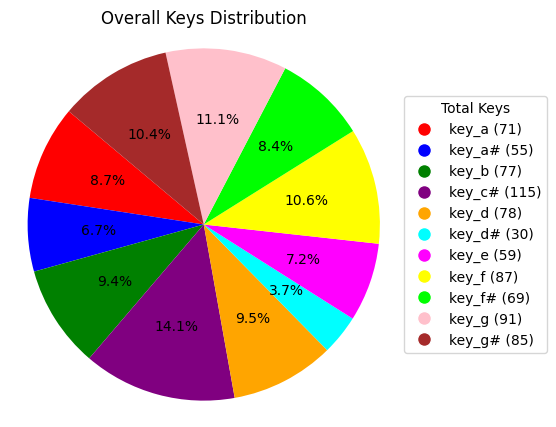

In [ ]:
key_df = df_da[key_columns]

key_counts = key_df.eq(1).sum()

plt.figure(figsize=(5, 5))
plt.pie(key_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts.index])
plt.title('Overall Keys Distribution')
plt.axis('equal')

legend_labels = [key + f" ({key_counts[key]})" for key in key_counts.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts.index)]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), title='Total Keys')

plt.show()




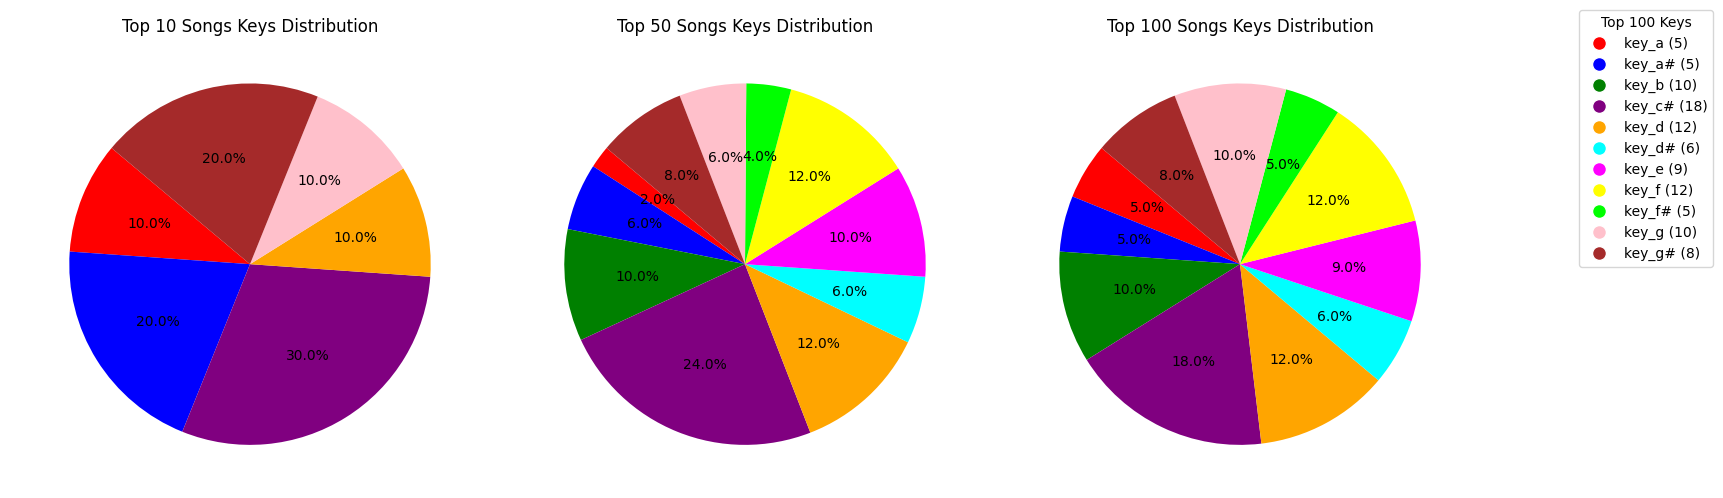

In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs]

chart_titles = ['Top 10 Songs Keys Distribution', 'Top 50 Songs Keys Distribution', 'Top 100 Songs Keys Distribution']

fig, axes = plt.subplots(1, len(dataframes), figsize=(15, 5))

for i, (df_da_copy, title) in enumerate(zip(dataframes, chart_titles)):
    key_df = df_da_copy[key_columns]

    key_counts = key_df.eq(1).sum()

    key_counts_filtered = key_counts[key_counts > 0]

    ax = axes[i]
    ax.pie(key_counts_filtered, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts_filtered.index])
    ax.set_title(title)
    ax.axis('equal')

legend_labels = [key + f" ({key_counts_filtered[key]})" for key in key_counts_filtered.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts_filtered.index)]
fig.legend(handles=legend_patches, loc='upper right', title='Top 100 Keys', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']
key_of_interest = 'key_c#'

In [ ]:
df_da.shape

(817, 23)

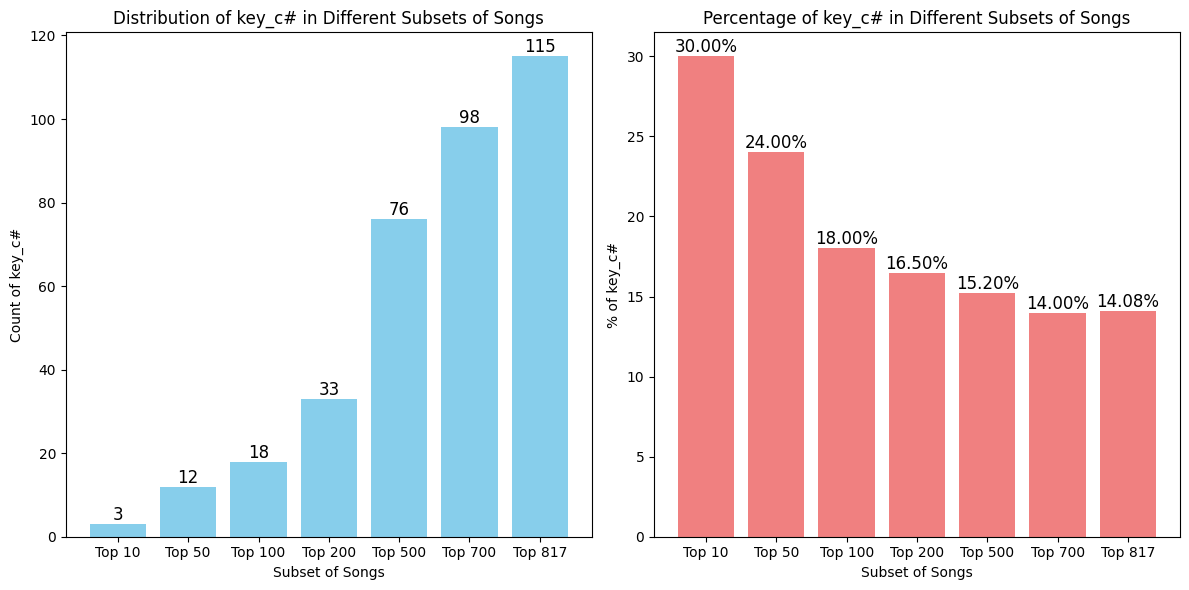

In [ ]:
key_counts = []
key_percentages = []

for df in dataframes:
    key_count = df[key_of_interest].eq(1).sum()
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(labels, key_counts, color='skyblue')
plt.xlabel('Subset of Songs')
plt.ylabel(f'Count of {key_of_interest}')
plt.title(f'Distribution of {key_of_interest} in Different Subsets of Songs')

for i, count in enumerate(key_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.subplot(122)
plt.bar(labels, key_percentages, color='lightcoral')
plt.xlabel('Subset of Songs')
plt.ylabel(f'% of {key_of_interest}')
plt.title(f'Percentage of {key_of_interest} in Different Subsets of Songs')

for i, percentage in enumerate(key_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


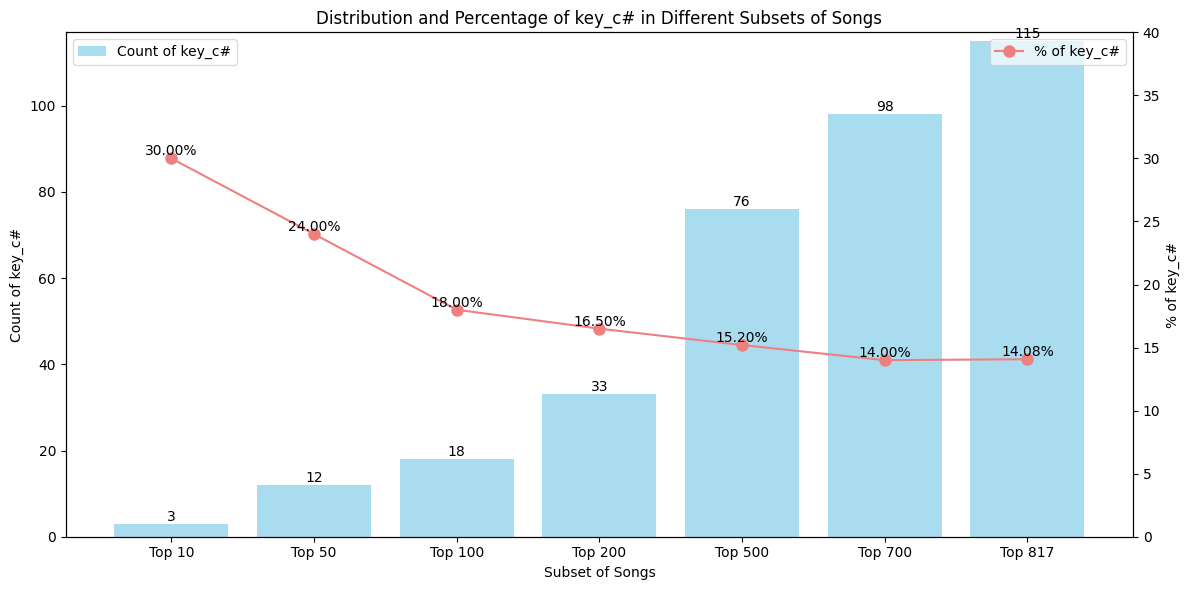

In [ ]:
key_counts = []
key_percentages = []

for df in dataframes:
    key_count = df[key_of_interest].eq(1).sum()
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(labels, key_counts, color='skyblue', alpha=0.7, label=f'Count of {key_of_interest}')
ax1.set_xlabel('Subset of Songs')
ax1.set_ylabel(f'Count of {key_of_interest}')
ax1.set_title(f'Distribution and Percentage of {key_of_interest} in Different Subsets of Songs')
ax1.set_ylim(0, max(key_counts) + 2)
#----
ax2 = ax1.twinx()
ax2.plot(labels, key_percentages, marker='o', color='lightcoral', linestyle='-', markersize=8, label=f'% of {key_of_interest}')
ax2.set_ylabel(f'% of {key_of_interest}')
ax2.set_ylim(0, max(key_percentages) + 10)

for i, percentage in enumerate(key_percentages):
    ax2.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)
#---
for i, count in enumerate(key_counts):
    ax1.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

ax1.legend(loc='upper left', framealpha=0.7)
#---
ax2.legend(loc='upper right', framealpha=0.7)

plt.tight_layout()
plt.show()

### While one might be tempted to get ride of #Keys, it appears that this is a big variable of interest.
C# appearances:
* Top 10: 30%
* Top 50: 24%
* Top 100: 18%

Starting from the last rows:
C# appearances:
* Last 10: 10%
* Last 50: 14%
* Last 100: 14%

### Massive contrast between Top 10 and Last 10, 300% factor


In [ ]:
df_da.head()

streams    bpm  danceability  valence  energy  acousticness  \
0  0.039685  125.0          80.0     89.0    83.0          31.0   
1  0.037533   92.0          71.0     61.0    74.0           7.0   
2  0.039298  138.0          51.0     32.0    53.0          17.0   
3  0.224794  170.0          55.0     58.0    72.0          11.0   
4  0.085117  144.0          65.0     23.0    80.0          14.0   

   instrumentalness  liveness  speechiness  key_a  ...  key_d  key_d#  key_e  \
0               0.0       8.0          4.0    0.0  ...    0.0     0.0    0.0   
1               0.0      10.0          4.0    0.0  ...    0.0     0.0    0.0   
2               0.0      31.0          6.0    0.0  ...    0.0     0.0    0.0   
3               0.0      11.0         15.0    1.0  ...    0.0     0.0    0.0   
4              63.0      11.0          6.0    1.0  ...    0.0     0.0    0.0   

   key_f  key_f#  key_g  key_g#  mode_major  mode_minor  key  
0    0.0     0.0    0.0     0.0         1.0         0.0    B  
1    0.0     0.0    0.0     0.0         1.0         0.0   C#  
2    1.0     0.0    0.0     0.0         1.0         0.0    F  
3    0.0     0.0    0.0     0.0         1.0         0.0    A  
4    0.0     0.0    0.0     0.0         0.0         1.0    A  

[5 rows x 23 columns]

## Analysis --> Mode: Major & Minor

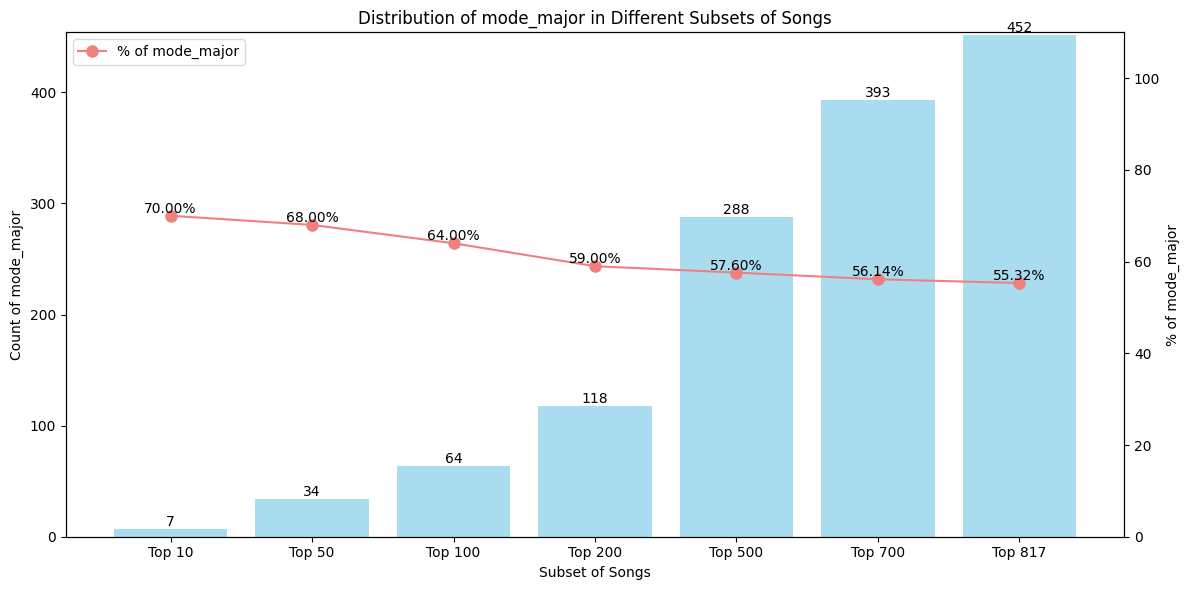

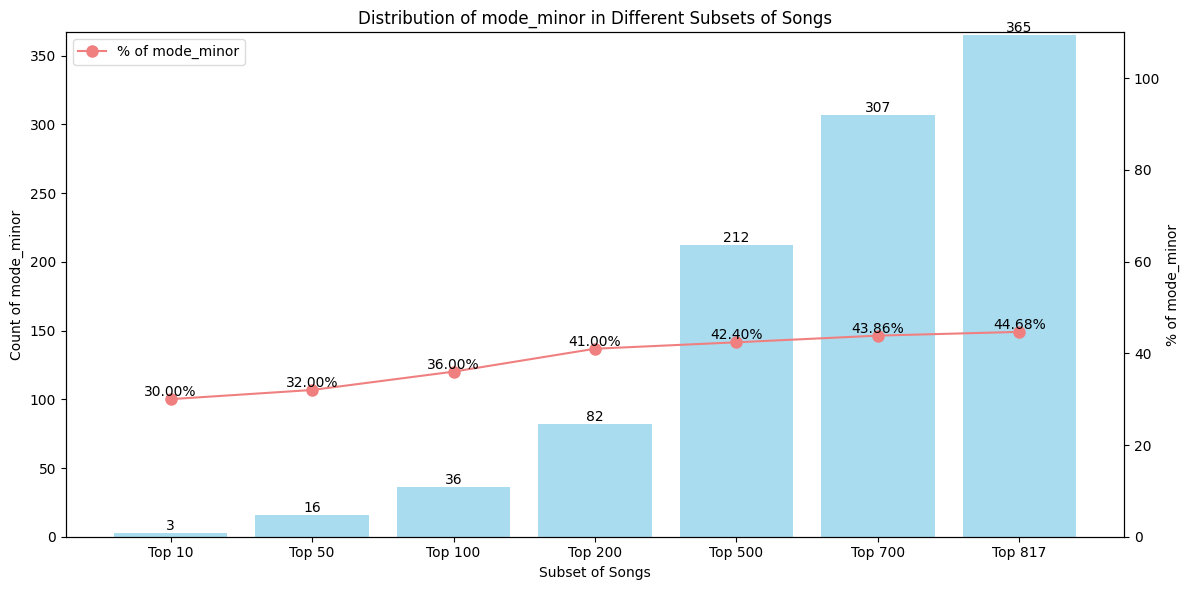

In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']

columns_of_interest = ['mode_major', 'mode_minor']

counts_1 = {col: [] for col in columns_of_interest}
counts_0 = {col: [] for col in columns_of_interest}

for df in dataframes:
    for col in columns_of_interest:
        count_1 = df[col].eq(1.0).sum()
        count_0 = len(df) - count_1
        counts_1[col].append(count_1)
        counts_0[col].append(count_0)

for col in columns_of_interest:
    plt.figure(figsize=(12, 6))

    plt.bar(labels, counts_1[col], color='skyblue', alpha=0.7, label=f'Count of {col} (1.0)')
    plt.xlabel('Subset of Songs')
    plt.ylabel(f'Count of {col}')
    plt.title(f'Distribution of {col} in Different Subsets of Songs')
    plt.ylim(0, max(counts_1[col]) + 2)

    for i, count in enumerate(counts_1[col]):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

    plt.twinx()
    plt.plot(labels, [(count / len(df)) * 100 for count, df in zip(counts_1[col], dataframes)], marker='o', color='lightcoral', linestyle='-', markersize=8, label=f'% of {col}')
    plt.ylabel(f'% of {col}')
    plt.ylim(0, 110)

    for i, count in enumerate(counts_1[col]):
        plt.text(i, (count / len(dataframes[i])) * 100, f'{(count / len(dataframes[i])) * 100:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.legend(loc='upper left', framealpha=0.7)
    plt.tight_layout()

plt.show()


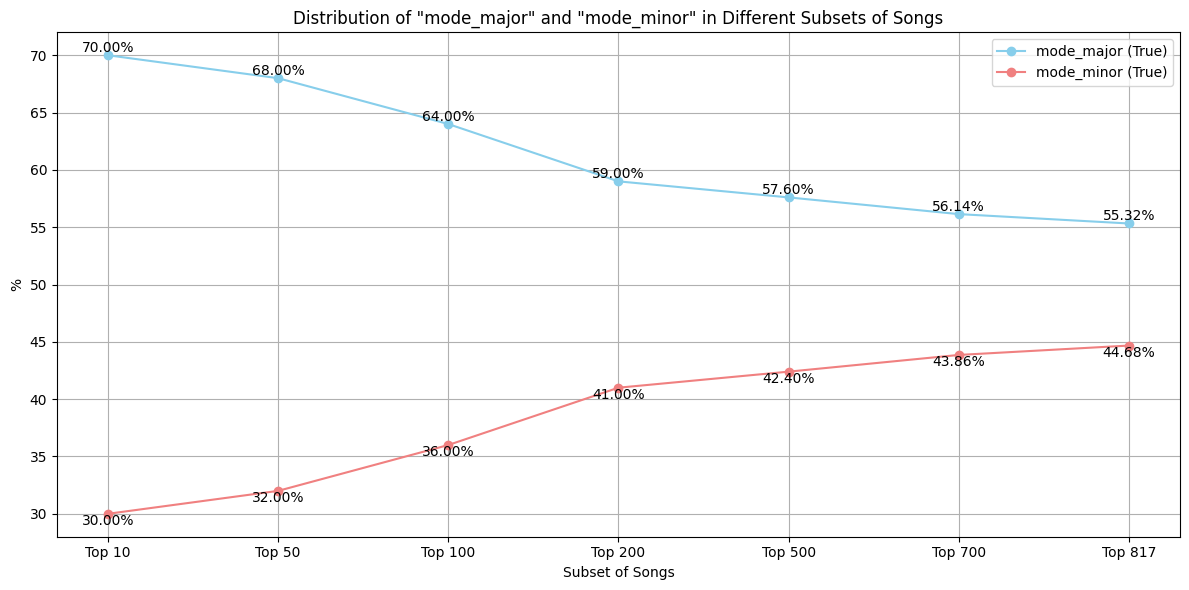

In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']

columns_of_interest = ['mode_major', 'mode_minor']

percentages_major = []
percentages_minor = []

for df_da in dataframes:
    total_count = len(df_da)
    count_major = df_da['mode_major'].sum()
    count_minor = df_da['mode_minor'].sum()
    percentage_major = (count_major / total_count) * 100
    percentage_minor = (count_minor / total_count) * 100
    percentages_major.append(percentage_major)
    percentages_minor.append(percentage_minor)

plt.figure(figsize=(12, 6))
plt.plot(labels, percentages_major, marker='o', linestyle='-', color='skyblue', label='mode_major (True)')
plt.plot(labels, percentages_minor, marker='o', linestyle='-', color='lightcoral', label='mode_minor (True)')
plt.xlabel('Subset of Songs')
plt.ylabel('%')
plt.title('Distribution of "mode_major" and "mode_minor" in Different Subsets of Songs')
plt.legend()
plt.grid(True)

for i, (p_major, p_minor) in enumerate(zip(percentages_major, percentages_minor)):
    plt.text(i, p_major, f'{p_major:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(i, p_minor, f'{p_minor:.2f}%', ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()


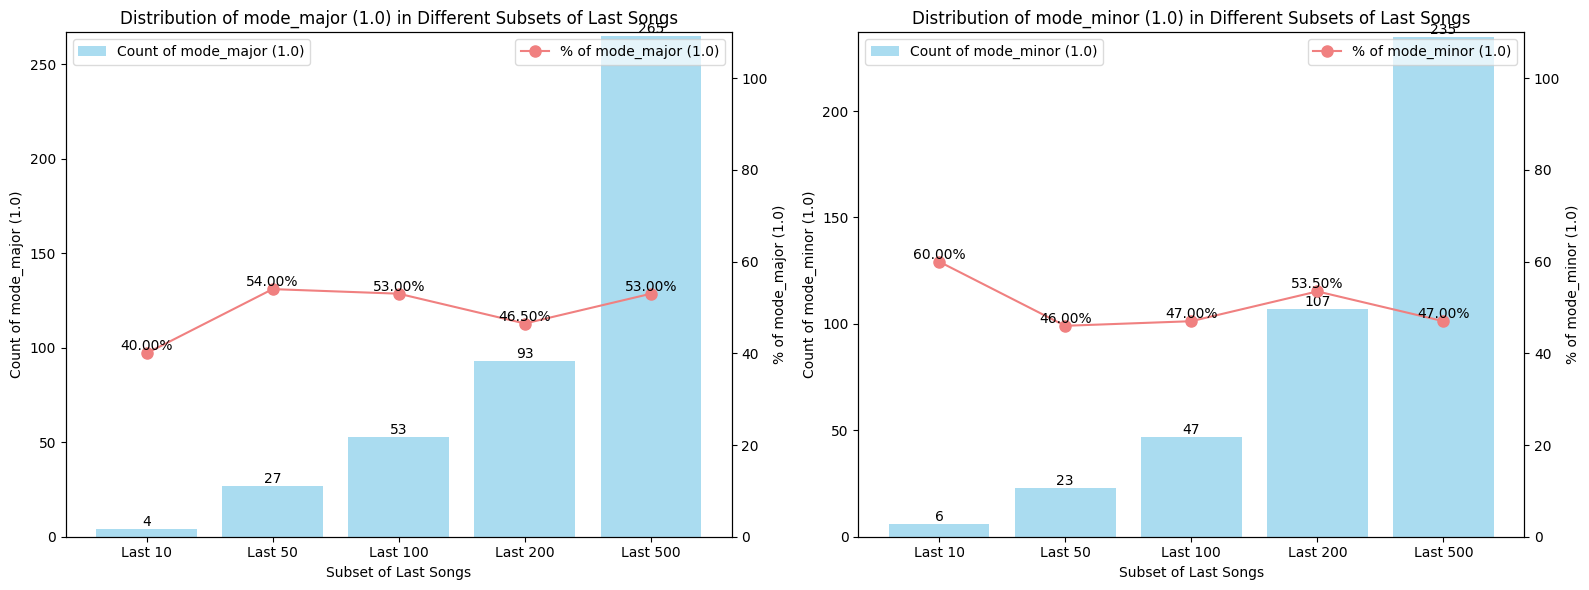

In [ ]:
last_dataframes = [last_10_songs, last_50_songs, last_100_songs, last_200_songs, last_500_songs]
last_labels = ['Last 10', 'Last 50', 'Last 100', 'Last 200', 'Last 500']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

last_counts_1 = {col: [] for col in columns_of_interest}
last_counts_0 = {col: [] for col in columns_of_interest}

for df in last_dataframes:
    for col in columns_of_interest:
        last_count_1 = df[col].eq(1.0).sum()
        last_count_0 = len(df) - last_count_1
        last_counts_1[col].append(last_count_1)
        last_counts_0[col].append(last_count_0)

for i, col in enumerate(columns_of_interest):
    ax = axes[i]

    ax.bar(last_labels, last_counts_1[col], color='skyblue', alpha=0.7, label=f'Count of {col} (1.0)')
    ax.set_xlabel('Subset of Last Songs')
    ax.set_ylabel(f'Count of {col} (1.0)')
    ax.set_title(f'Distribution of {col} (1.0) in Different Subsets of Last Songs')
    ax.set_ylim(0, max(last_counts_1[col]) + 2)

    for j, count in enumerate(last_counts_1[col]):
        ax.text(j, count, str(count), ha='center', va='bottom', fontsize=10)

    ax2 = ax.twinx()
    ax2.plot(last_labels, [(count / len(df)) * 100 for count, df in zip(last_counts_1[col], last_dataframes)], marker='o', color='lightcoral', linestyle='-', markersize=8, label=f'% of {col} (1.0)')
    ax2.set_ylabel(f'% of {col} (1.0)')
    ax2.set_ylim(0, 110)

    for j, count in enumerate(last_counts_1[col]):
        ax2.text(j, (count / len(last_dataframes[j])) * 100, f'{(count / len(last_dataframes[j])) * 100:.2f}%', ha='center', va='bottom', fontsize=10)

    ax.legend(loc='upper left', framealpha=0.7)
    ax2.legend(loc='upper right', framealpha=0.7)
    plt.tight_layout()

plt.show()


In [ ]:
df_da.columns

Index(['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'key_a', 'key_a#',
       'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#',
       'key_g', 'key_g#', 'mode_major', 'mode_minor', 'key'],
      dtype='object')

### Analysis : BPM

In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']
last_dataframes = [last_10_songs, last_50_songs, last_100_songs, last_200_songs, last_500_songs]
last_labels = ['Last 10', 'Last 50', 'Last 100', 'Last 200', 'Last 500']

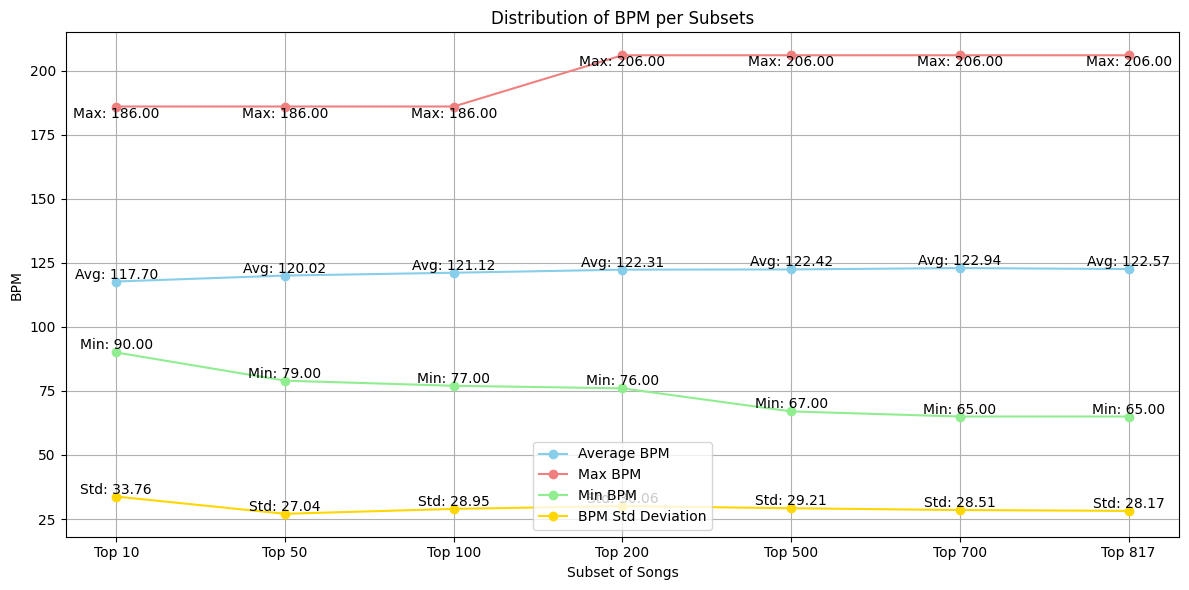

In [ ]:
bpm_min = []
bpm_max = []
bpm_avg = []
bpm_std = []

for df in dataframes:
    bpm_min.append(df['bpm'].min())
    bpm_max.append(df['bpm'].max())
    bpm_avg.append(df['bpm'].mean())
    bpm_std.append(df['bpm'].std())

plt.figure(figsize=(12, 6))

# Line for average BPM
plt.plot(labels, bpm_avg, marker='o', linestyle='-', color='skyblue', label='Average BPM')

# Line for max BPM
plt.plot(labels, bpm_max, marker='o', linestyle='-', color='lightcoral', label='Max BPM')

# Line for min BPM
plt.plot(labels, bpm_min, marker='o', linestyle='-', color='lightgreen', label='Min BPM')

# Line for std BPM
plt.plot(labels, bpm_std, marker='o', linestyle='-', color='gold', label='BPM Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('BPM')
plt.title('Distribution of BPM per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(bpm_avg, bpm_max, bpm_min, bpm_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


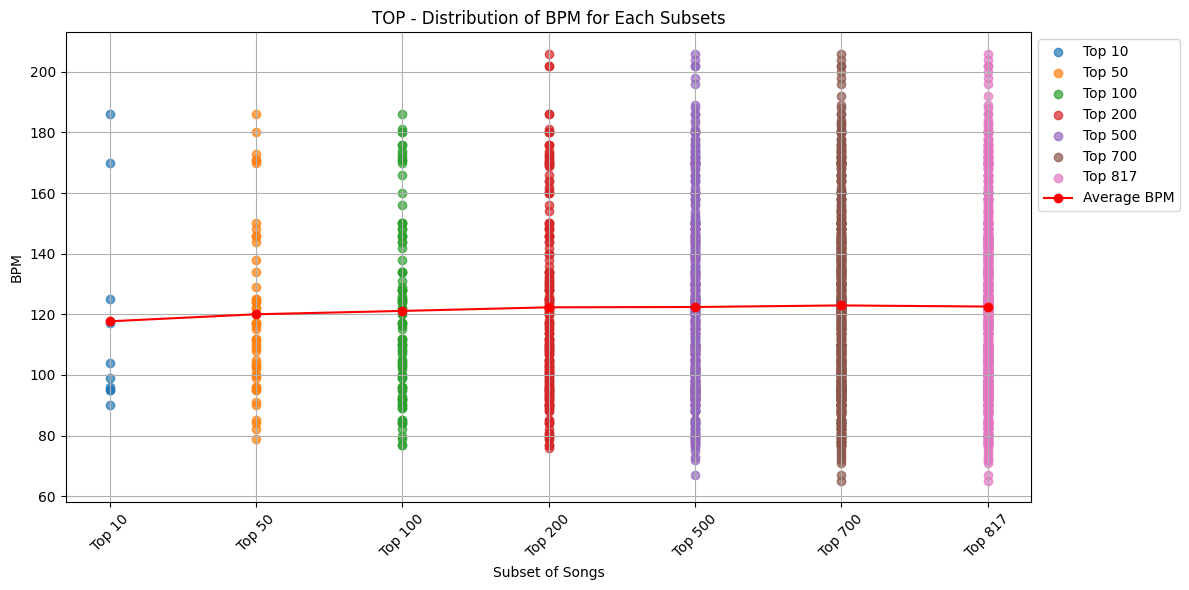

In [ ]:
plt.figure(figsize=(12, 6))
bpm_avg = []

for i, df in enumerate(dataframes):
    plt.scatter([i] * len(df), df['bpm'], label=labels[i], alpha=0.7)
    avg = df['bpm'].mean()
    bpm_avg.append(avg)

plt.plot(range(len(dataframes)), bpm_avg, marker='o', linestyle='-', color='red', label='Average BPM')
plt.xlabel('Subset of Songs')
plt.ylabel('BPM')
plt.title('TOP - Distribution of BPM for Each Subsets')
plt.xticks(range(len(dataframes)), labels, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()


### Analysis Danceability

In [ ]:
df_da.shape

(817, 23)

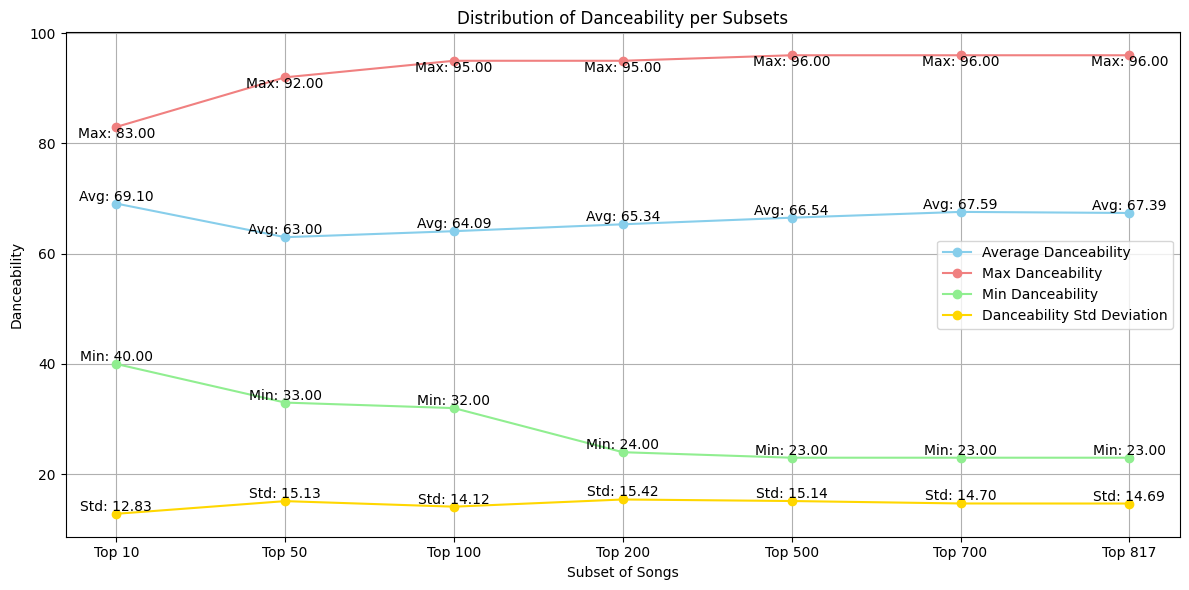

In [ ]:
danceability_min = []
danceability_max = []
danceability_avg = []
danceability_std = []

for df in dataframes:
    danceability_min.append(df['danceability'].min())
    danceability_max.append(df['danceability'].max())
    danceability_avg.append(df['danceability'].mean())
    danceability_std.append(df['danceability'].std())

plt.figure(figsize=(12, 6))

# Line for average danceability
plt.plot(labels, danceability_avg, marker='o', linestyle='-', color='skyblue', label='Average Danceability')

# Line for max danceability
plt.plot(labels, danceability_max, marker='o', linestyle='-', color='lightcoral', label='Max Danceability')

# Line for min danceability
plt.plot(labels, danceability_min, marker='o', linestyle='-', color='lightgreen', label='Min Danceability')

# Line for std danceability
plt.plot(labels, danceability_std, marker='o', linestyle='-', color='gold', label='Danceability Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Danceability')
plt.title('Distribution of Danceability per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(danceability_avg, danceability_max, danceability_min, danceability_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


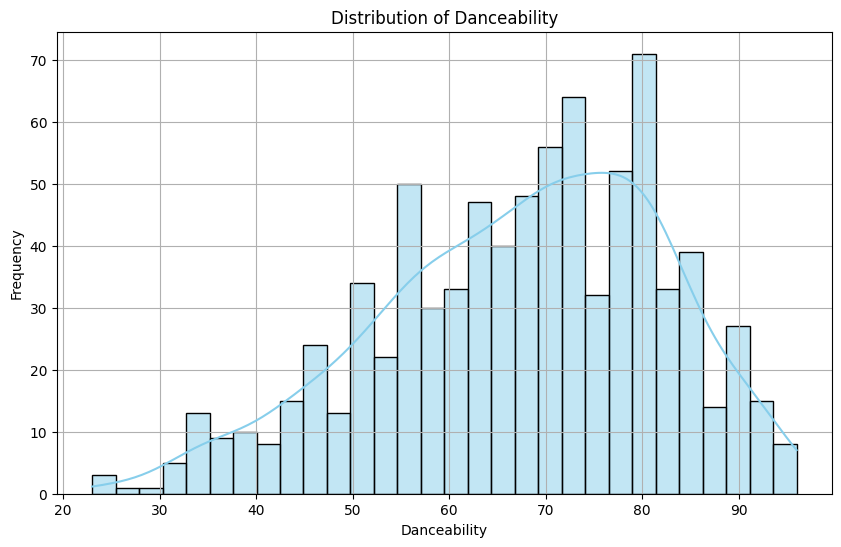

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['danceability'], bins=30, kde=True, color='skyblue')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.grid(True)
plt.show()

### Analysis Valence

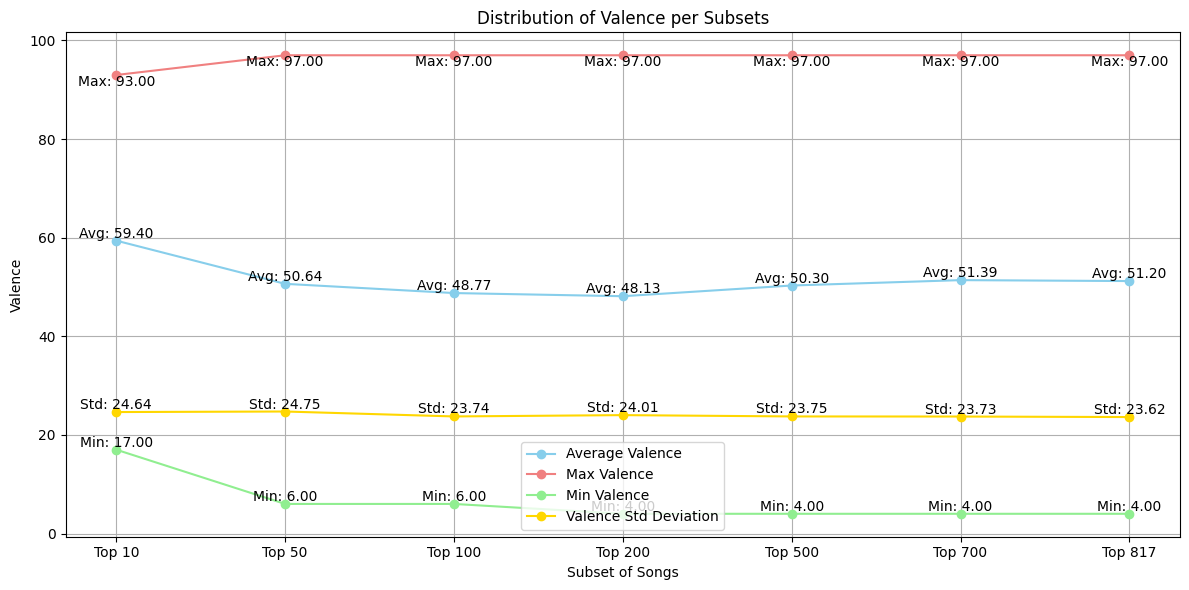

In [ ]:
valence_min = []
valence_max = []
valence_avg = []
valence_std = []

for df in dataframes:
    valence_min.append(df['valence'].min())
    valence_max.append(df['valence'].max())
    valence_avg.append(df['valence'].mean())
    valence_std.append(df['valence'].std())

plt.figure(figsize=(12, 6))

# Line for average Valence
plt.plot(labels, valence_avg, marker='o', linestyle='-', color='skyblue', label='Average Valence')

# Line for max Valence
plt.plot(labels, valence_max, marker='o', linestyle='-', color='lightcoral', label='Max Valence')

# Line for min Valence
plt.plot(labels, valence_min, marker='o', linestyle='-', color='lightgreen', label='Min Valence')

# Line for std Valence
plt.plot(labels, valence_std, marker='o', linestyle='-', color='gold', label='Valence Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Valence')
plt.title('Distribution of Valence per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(valence_avg, valence_max, valence_min, valence_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


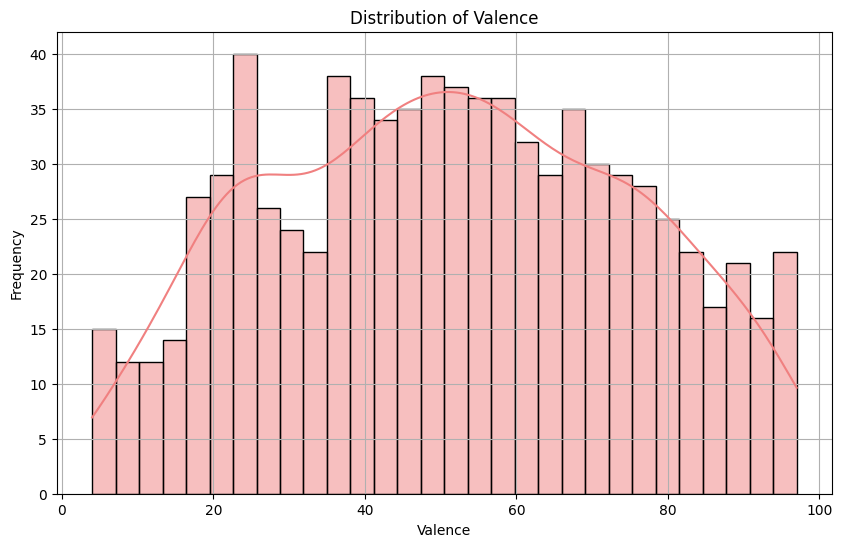

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['valence'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.title('Distribution of Valence')
plt.grid(True)
plt.show()

## Analysis Energy

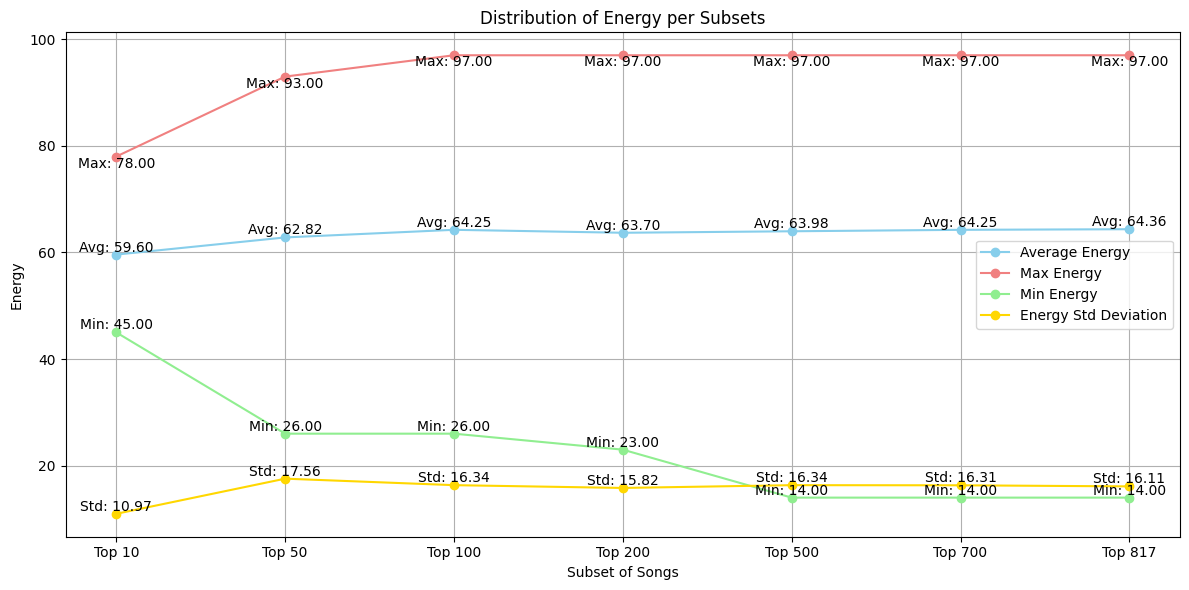

In [ ]:
energy_min = []
energy_max = []
energy_avg = []
energy_std = []

for df_da in dataframes:
    energy_min.append(df_da['energy'].min())
    energy_max.append(df_da['energy'].max())
    energy_avg.append(df_da['energy'].mean())
    energy_std.append(df_da['energy'].std())

plt.figure(figsize=(12, 6))

# Line for average Energy
plt.plot(labels, energy_avg, marker='o', linestyle='-', color='skyblue', label='Average Energy')

# Line for max Energy
plt.plot(labels, energy_max, marker='o', linestyle='-', color='lightcoral', label='Max Energy')

# Line for min Energy
plt.plot(labels, energy_min, marker='o', linestyle='-', color='lightgreen', label='Min Energy')

# Line for std Energy
plt.plot(labels, energy_std, marker='o', linestyle='-', color='gold', label='Energy Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Energy')
plt.title('Distribution of Energy per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(energy_avg, energy_max, energy_min, energy_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


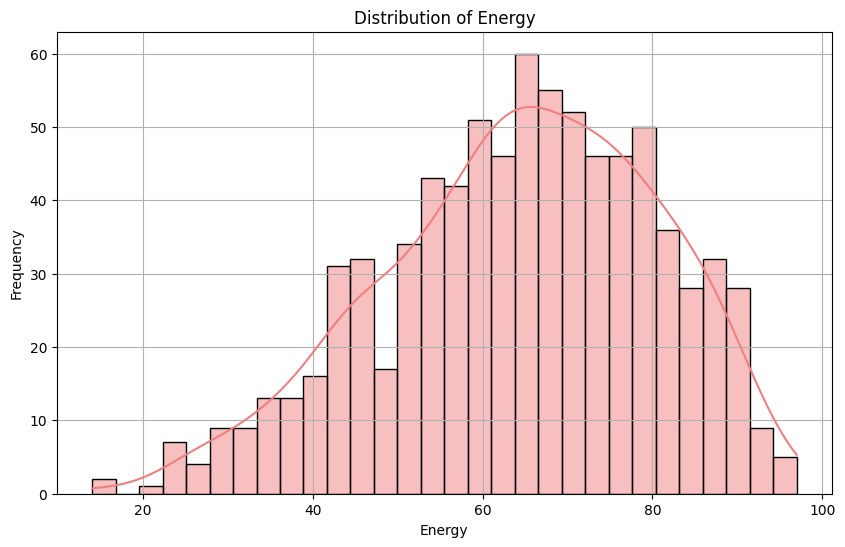

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['energy'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.grid(True)
plt.show()

## Analysis Acoustinecness

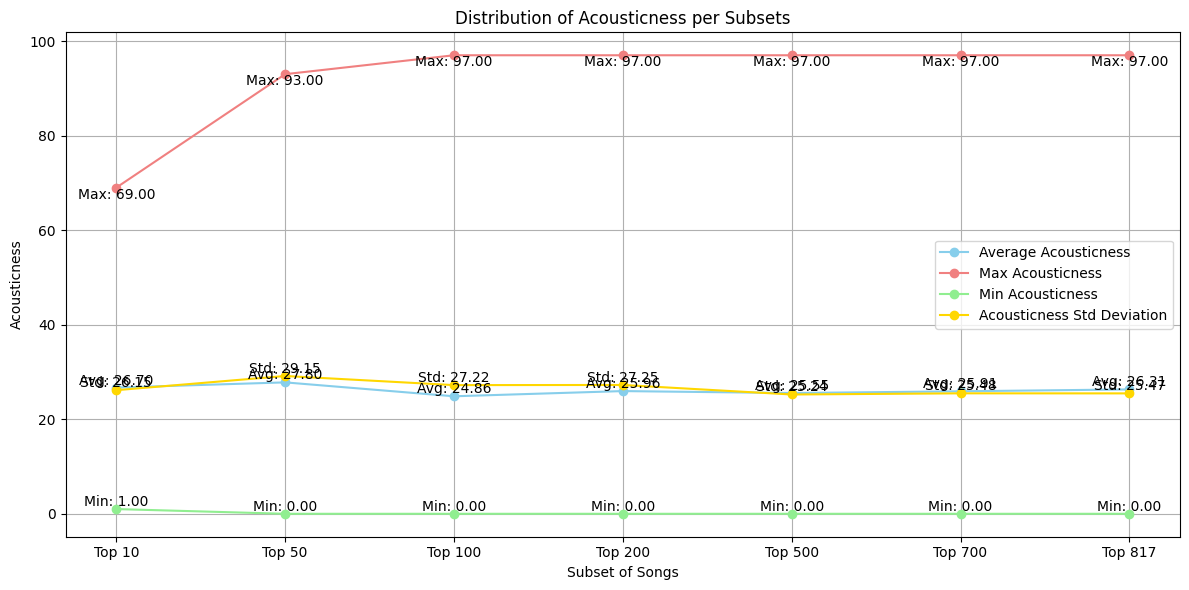

In [ ]:
acousticness_min = []
acousticness_max = []
acousticness_avg = []
acousticness_std = []

for df in dataframes:
    acousticness_min.append(df['acousticness'].min())
    acousticness_max.append(df['acousticness'].max())
    acousticness_avg.append(df['acousticness'].mean())
    acousticness_std.append(df['acousticness'].std())

plt.figure(figsize=(12, 6))

# Line for average Acousticness
plt.plot(labels, acousticness_avg, marker='o', linestyle='-', color='skyblue', label='Average Acousticness')

# Line for max Acousticness
plt.plot(labels, acousticness_max, marker='o', linestyle='-', color='lightcoral', label='Max Acousticness')

# Line for min Acousticness
plt.plot(labels, acousticness_min, marker='o', linestyle='-', color='lightgreen', label='Min Acousticness')

# Line for std Acousticness
plt.plot(labels, acousticness_std, marker='o', linestyle='-', color='gold', label='Acousticness Std Deviation')

plt.xlabel('Subset of Songs')
plt.ylabel('Acousticness')
plt.title('Distribution of Acousticness per Subsets')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(acousticness_avg, acousticness_max, acousticness_min, acousticness_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


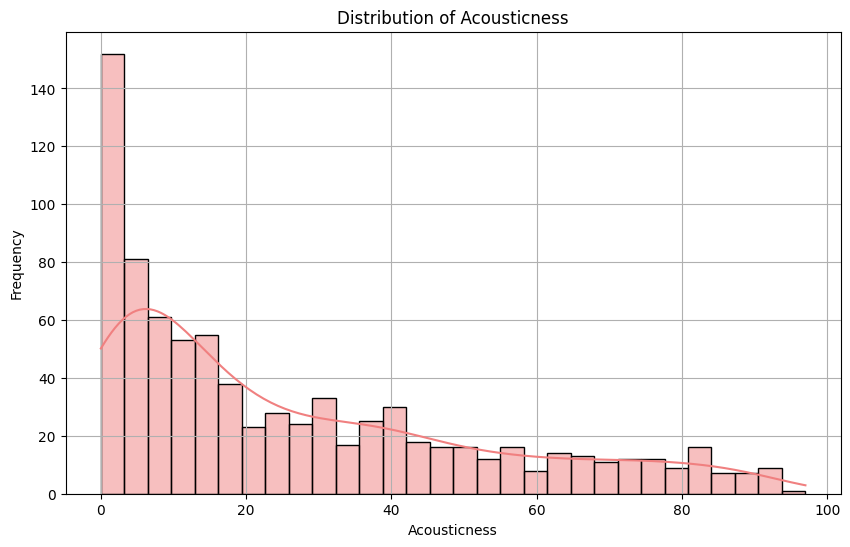

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['acousticness'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.title('Distribution of Acousticness')
plt.grid(True)
plt.show()

### Done
### Next step is to download dataframe
### And move on to modeling

In [ ]:
df_da.head()

streams    bpm  danceability  valence  energy  acousticness  \
179  1.000000   96.0          83.0     93.0    65.0          58.0   
41   0.788228   90.0          76.0     91.0    50.0          54.0   
162  0.761793  104.0          77.0     36.0    63.0           1.0   
84   0.748157  170.0          59.0     48.0    76.0           4.0   
140  0.728142  125.0          77.0     74.0    78.0           4.0   

     instrumentalness  liveness  speechiness  key_a  ...  key_d  key_d#  \
179               0.0       9.0          8.0    0.0  ...    0.0     0.0   
41                0.0       7.0          5.0    0.0  ...    1.0     0.0   
162               0.0      36.0          5.0    0.0  ...    0.0     0.0   
84                0.0      10.0          5.0    0.0  ...    0.0     0.0   
140               0.0      23.0         11.0    0.0  ...    0.0     0.0   

     key_e  key_f  key_f#  key_g  key_g#  mode_major  mode_minor  key  
179    0.0    0.0     0.0    0.0     0.0         0.0         1.0   C#  
41     0.0    0.0     0.0    0.0     0.0         1.0         0.0    D  
162    0.0    0.0     0.0    0.0     0.0         1.0         0.0   C#  
84     0.0    0.0     0.0    0.0     0.0         1.0         0.0   C#  
140    0.0    0.0     0.0    0.0     0.0         0.0         1.0   A#  

[5 rows x 23 columns]

In [ ]:
df_da.shape

(817, 23)

In [ ]:
df_da.columns

Index(['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'key_a', 'key_a#',
       'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#',
       'key_g', 'key_g#', 'mode_major', 'mode_minor', 'key'],
      dtype='object')

In [ ]:
df_da.shape

(817, 23)

In [ ]:
df_da.drop(columns=['key'], inplace=True)
df_da.head()

streams    bpm  danceability  valence  energy  acousticness  \
179  1.000000   96.0          83.0     93.0    65.0          58.0   
41   0.788228   90.0          76.0     91.0    50.0          54.0   
162  0.761793  104.0          77.0     36.0    63.0           1.0   
84   0.748157  170.0          59.0     48.0    76.0           4.0   
140  0.728142  125.0          77.0     74.0    78.0           4.0   

     instrumentalness  liveness  speechiness  key_a  ...  key_c#  key_d  \
179               0.0       9.0          8.0    0.0  ...     1.0    0.0   
41                0.0       7.0          5.0    0.0  ...     0.0    1.0   
162               0.0      36.0          5.0    0.0  ...     1.0    0.0   
84                0.0      10.0          5.0    0.0  ...     1.0    0.0   
140               0.0      23.0         11.0    0.0  ...     0.0    0.0   

     key_d#  key_e  key_f  key_f#  key_g  key_g#  mode_major  mode_minor  
179     0.0    0.0    0.0     0.0    0.0     0.0         0.0         1.0  
41      0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
162     0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
84      0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
140     0.0    0.0    0.0     0.0    0.0     0.0         0.0         1.0  

[5 rows x 22 columns]

In [ ]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 179 to 574
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   streams           816 non-null    float64
 1   bpm               817 non-null    float64
 2   danceability      817 non-null    float64
 3   valence           817 non-null    float64
 4   energy            817 non-null    float64
 5   acousticness      817 non-null    float64
 6   instrumentalness  817 non-null    float64
 7   liveness          817 non-null    float64
 8   speechiness       817 non-null    float64
 9   key_a             817 non-null    float64
 10  key_a#            817 non-null    float64
 11  key_b             817 non-null    float64
 12  key_c#            817 non-null    float64
 13  key_d             817 non-null    float64
 14  key_d#            817 non-null    float64
 15  key_e             817 non-null    float64
 16  key_f             817 non-null    float64
 17  

In [ ]:
%whos

Variable                                       Type              Data/Info
--------------------------------------------------------------------------
Axes3D                                         type              <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
MinMaxScaler                                   type              <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
acousticness_avg                               list              n=7
acousticness_max                               list              n=7
acousticness_min                               list              n=7
acousticness_std                               list              n=7
any_missing_values                             bool              True
any_missing_values_in_column                   Series            track_name              F<...>       False\ndtype: bool
average_streams                                list              n=11
avg                                            float64           26.30966952264382

In [ ]:
df_da.to_csv('df_data_features.csv', index=False)